# Marmoset single-nuclei RNAseq : endometrium

In [1]:
# LOAD LIBRARIES
suppressPackageStartupMessages(library(Seurat)) # v5
suppressPackageStartupMessages(library(SeuratData)) # v0.2.2
suppressPackageStartupMessages(library(SeuratDisk)) # v0.0.0.9020
suppressPackageStartupMessages(library(SeuratObject)) # v4.1.3
suppressPackageStartupMessages(library(tidyverse)) # v2.0.0
suppressPackageStartupMessages(library(ggpubr)) # v0.6.0
suppressPackageStartupMessages(library(reticulate)) 
suppressPackageStartupMessages(library(leiden)) 
suppressPackageStartupMessages(library(SingleR)) 
suppressPackageStartupMessages(library(SingleCellExperiment)) 

In [2]:
# Working directory set to source file location (in script/analysis/)

# Parameters 
species = "Marmoset" # Mouse  Marmoset Macaque or Human
outdir = "../../../results/snRNA-seq/"
myseed = 1212

In [3]:
# Load the post processing object 
postQC = readRDS(file = paste0(outdir, "seuratobject/",species,"_processed.rds"))


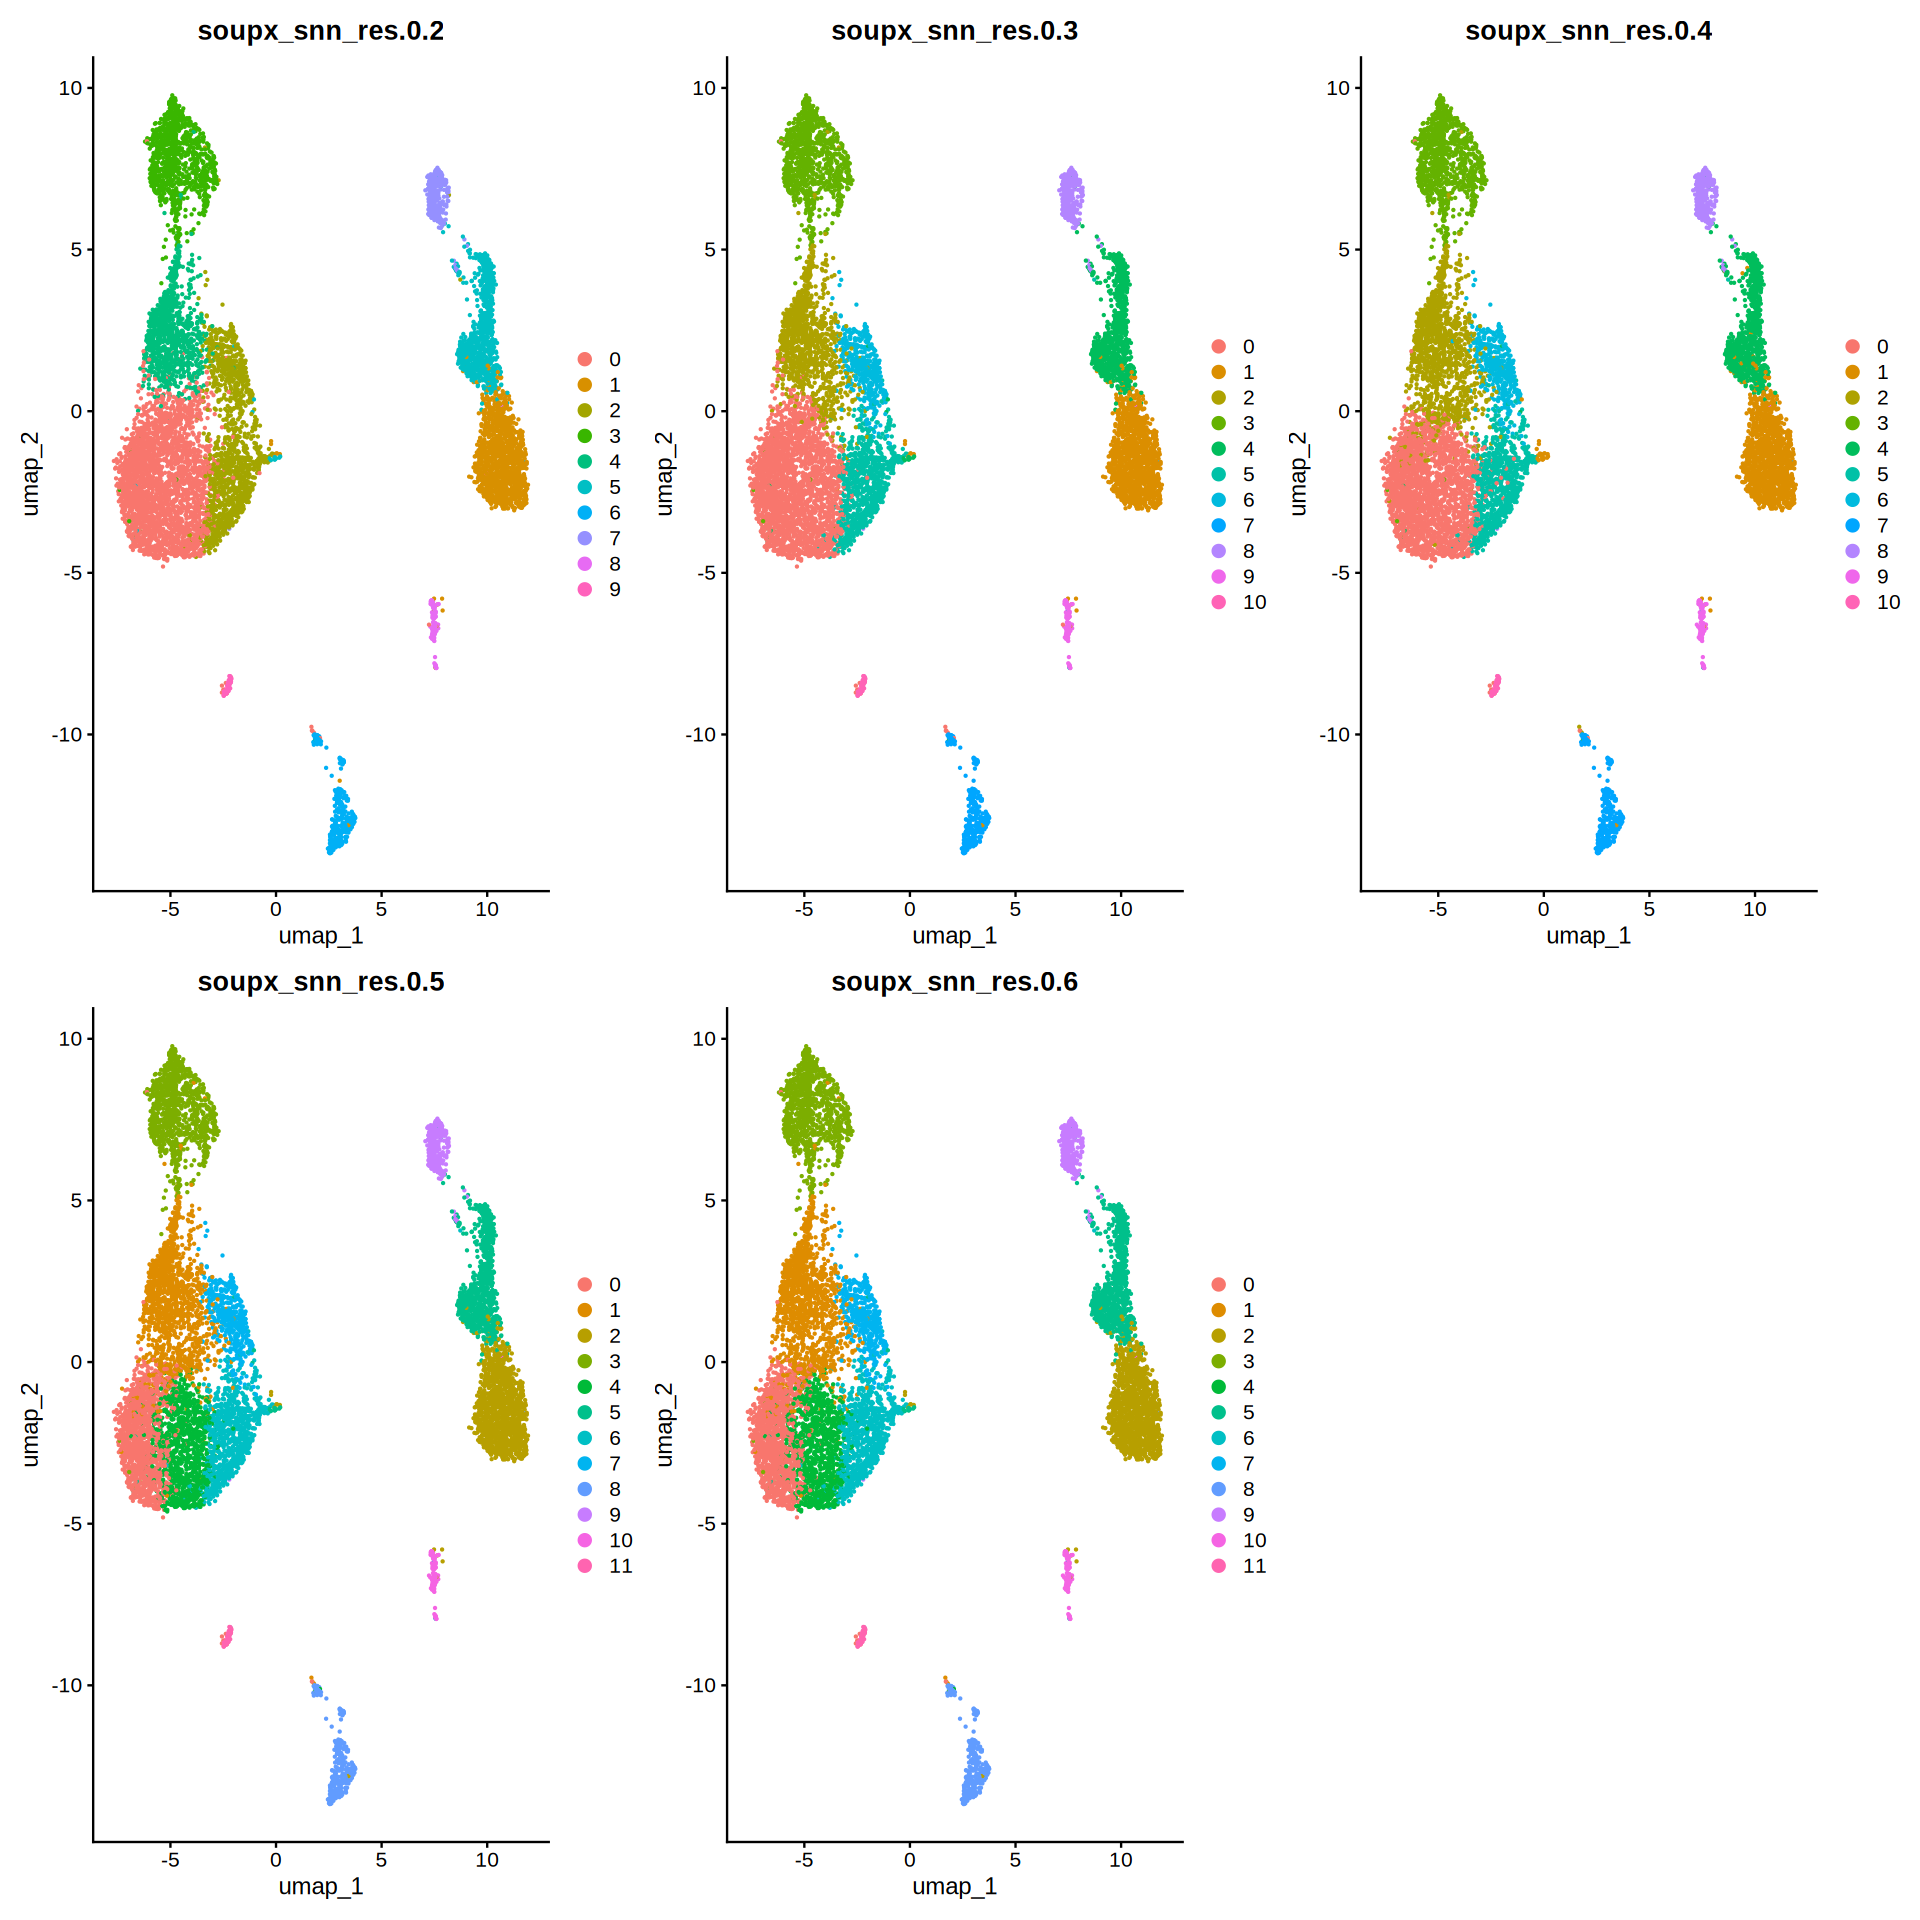

In [4]:
options(repr.plot.width=16, repr.plot.height=16)

# Look at the clustering 
DimPlot(postQC, reduction = "umap", 
        group.by = c("soupx_snn_res.0.2", "soupx_snn_res.0.3", "soupx_snn_res.0.4", "soupx_snn_res.0.5", "soupx_snn_res.0.6"))

Clustering parameters : nVariableFeature = 1000 resolution = 0.3

In [5]:
# Set the clsutering of interest as ident 
Idents(postQC) = postQC$soupx_snn_res.0.3

# Cellular annotation
We are interested in identifying epithelial cells in the clustering. The other cell types of the uterus (stromal cells, endothelial cells, all immunes cells, and myometrial cells are present but not annotated for this study).

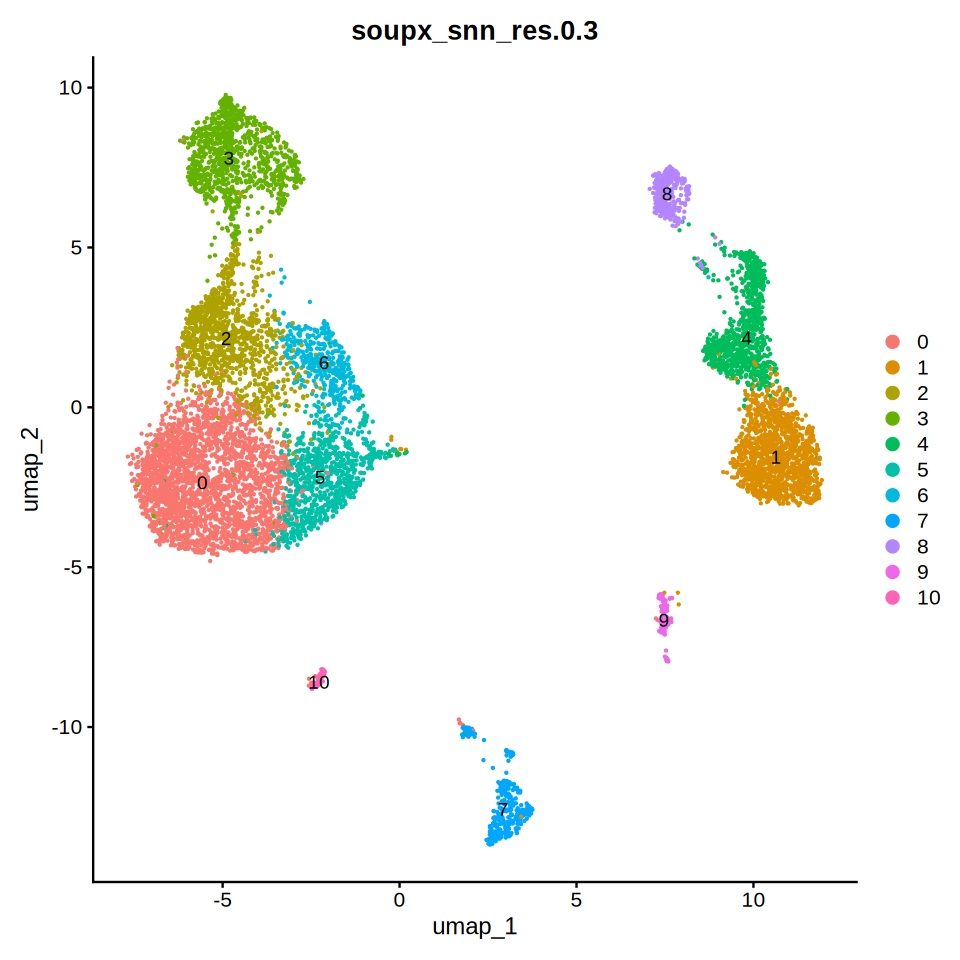

In [6]:
options(repr.plot.width=8, repr.plot.height=8)

# Clustering to annotate 
DimPlot(postQC, 
        reduction = "umap", 
        group.by = "soupx_snn_res.0.3", 
        label = TRUE)

## Markers for general epithelial lineage

CDH1 : more common protein for epithelial cell adhesion, not specific to any endometrial cell types

EPCAM : epithelial cell adhesion molecule

PAEP : elevated expression in the human endometrium in glandular and luminal epithelium. It is a glycoprotein expressed most likely in glands.

NECTIN1 : genes for the organisation of adherent junction in epithelium

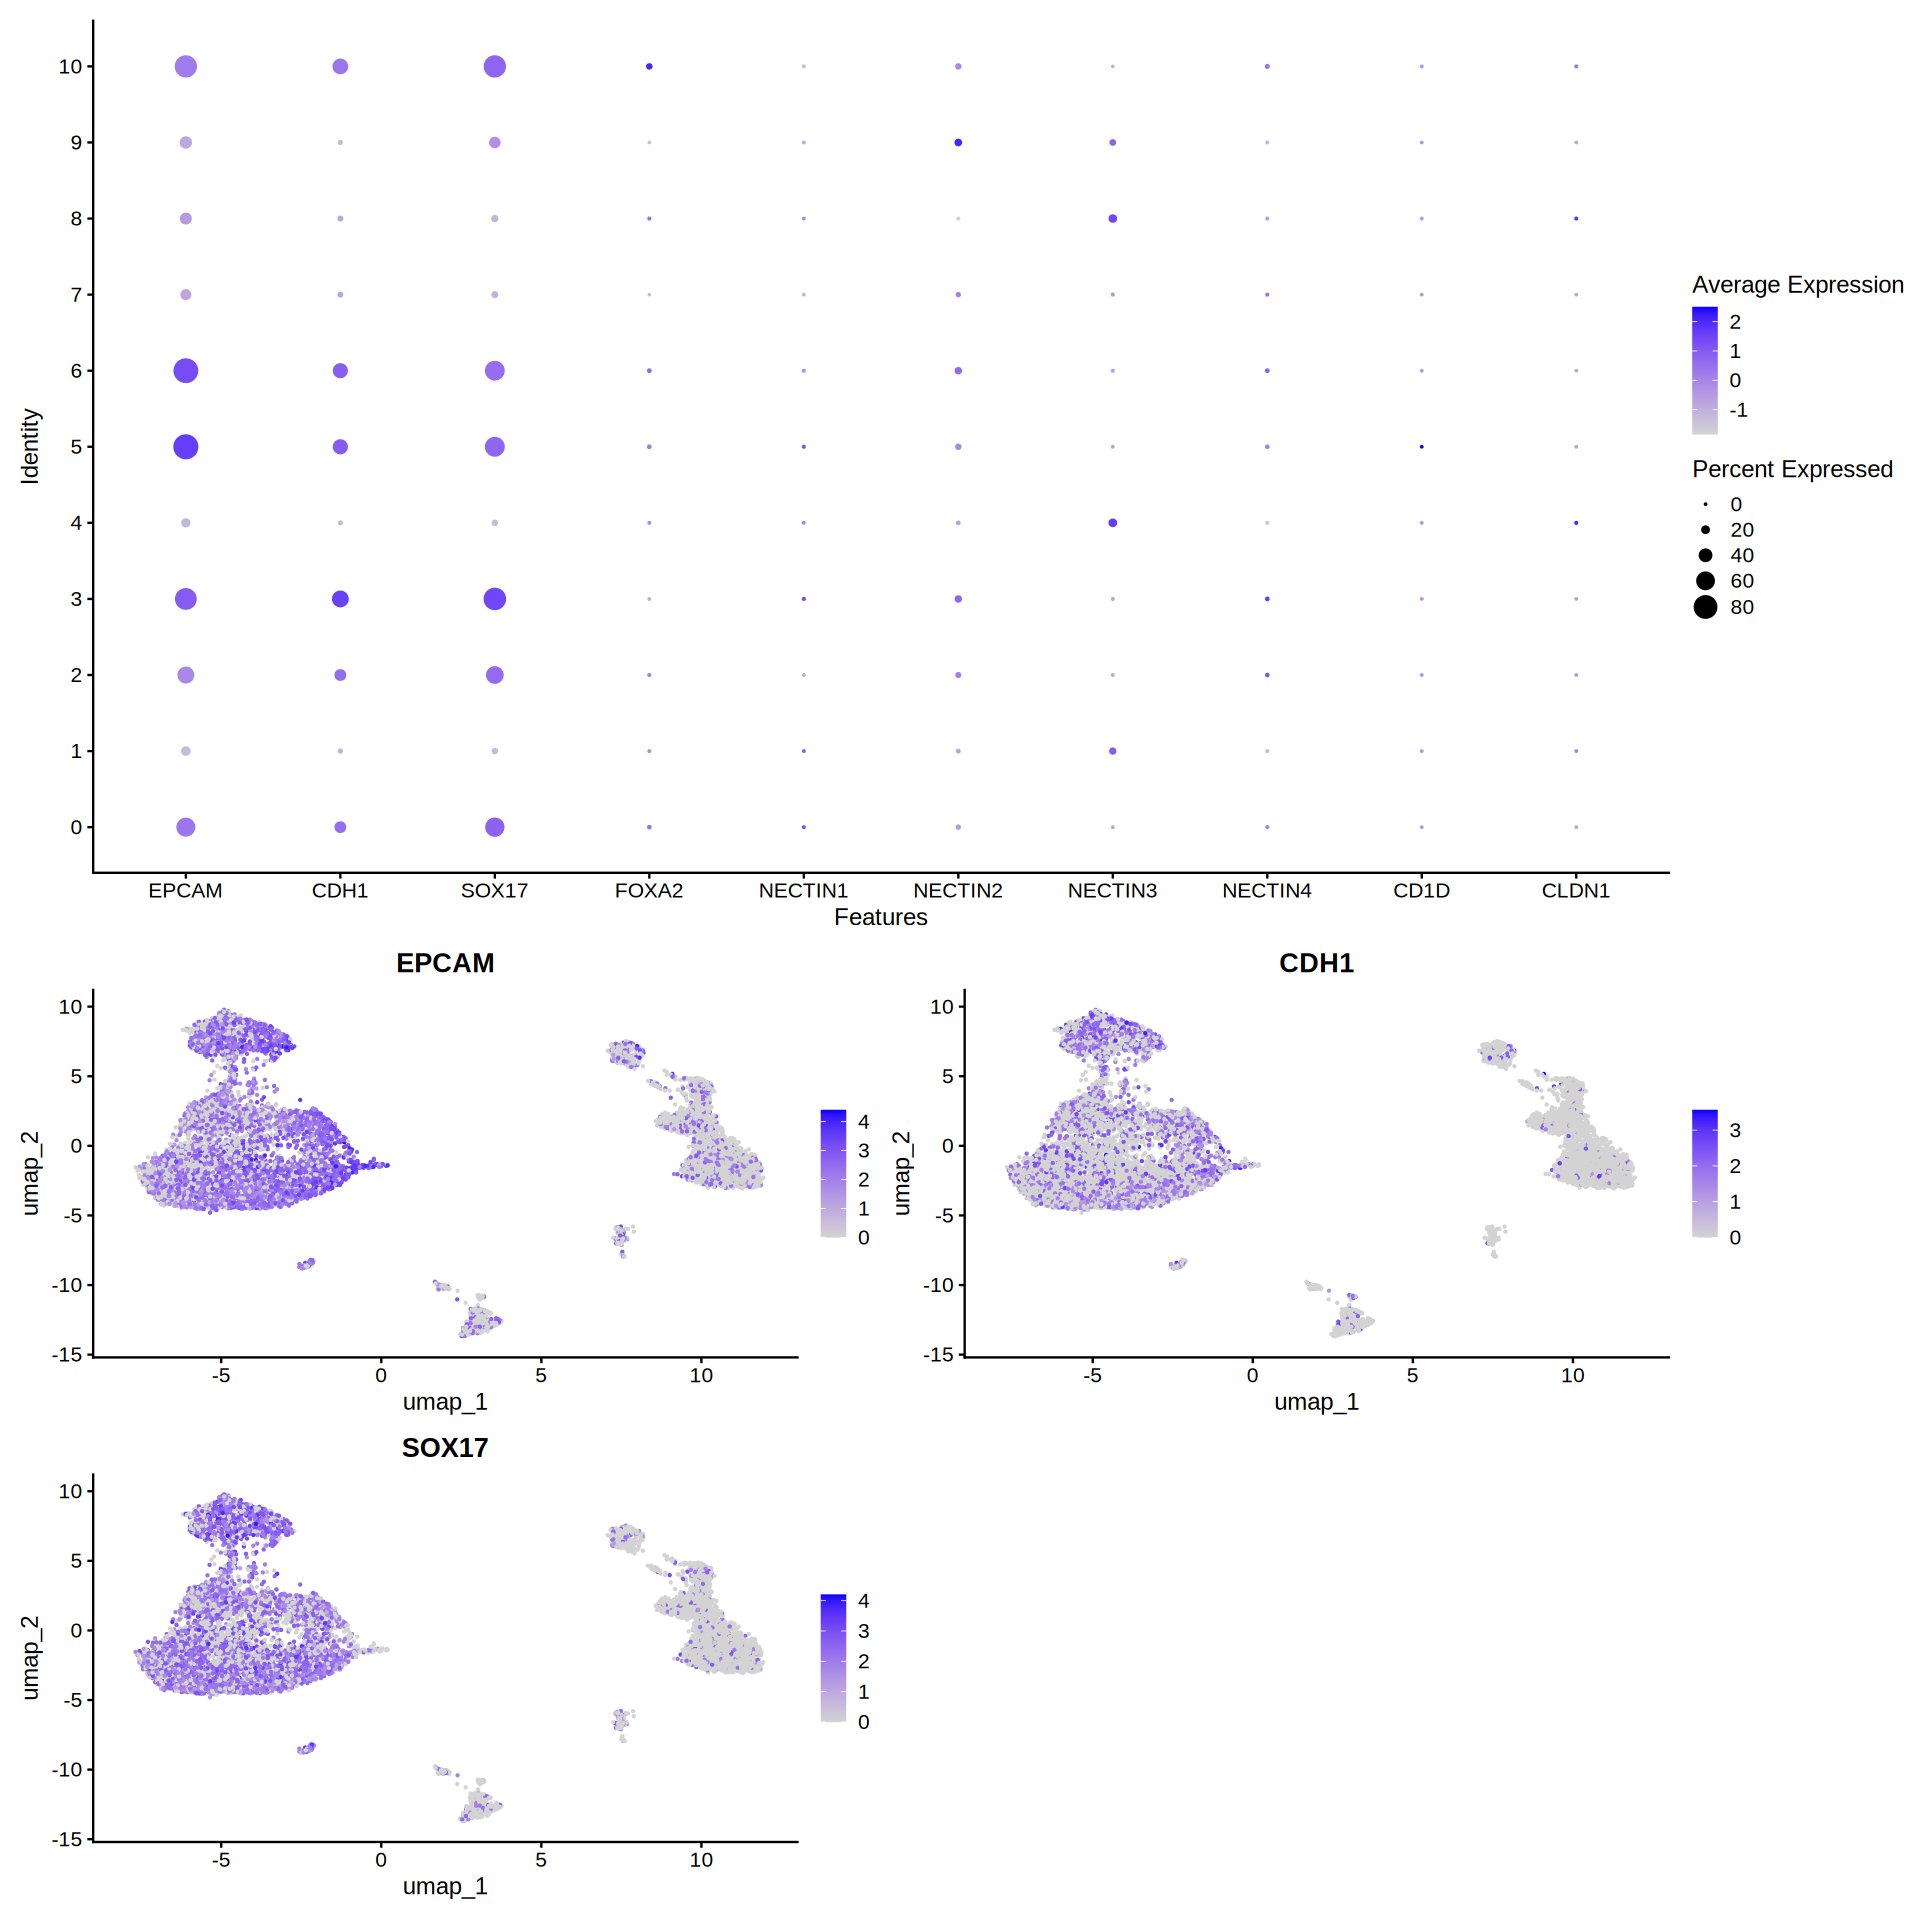

In [7]:
options(repr.plot.width=16, repr.plot.height=16)

#------------------------------------------
## Manual annotation using known epithelial markers 
a = DotPlot(postQC, features = c("EPCAM", "CDH1", "SOX17", "FOXA2", "NECTIN1", "NECTIN2", "NECTIN3", "NECTIN4", "CD1D", "CLDN1")) # "PAEP" not found in marmoset
b = FeaturePlot(postQC, features = c("EPCAM", "CDH1", "SOX17"), reduction = "umap")

a / b

So the clusters 0,2,3,5,6 and 10 ? are very likely to be epithelial cells. And this is coherent with the clustering.

Let’s look at other markers to refine the annotation.

## Markers for epithelial cell types

CRISP3 : cysteine rich secretory protein 3, secreted protein important in both female and male reproductive tissues.

OVGP1 : elevated expression in secretory cells is oviductal glycoprotein 1 

PLLP : markers for glandular and luminal cells

GPX3 : increased expression in the procession of secretory phase (TF)

SLC15A3 : decreased expression in the procession of secretory phase (TF)

HNF1B : TF glandular epithelium that get active during secretory phase

GPX3, DPP4, PAEP : gene expression in 2023 VentoTormo paper

FGF7 : marker of a specific glandular secretory cell in VentoTormo 2023 paper, but seems to be expressed in stromal cells in our case

LGF5 : SOX9 luminal epithelial cells

“HPRT1”, “SUFU”, “OPRK1”, “CBR3” : markers of pre-glandular cells

“MUC5B”, “TFF3”, “BPIFB1”, “SAA1” : markers of Muc epithelial cells Vento Tormo 2023

Warning message:
“The following requested variables were not found: PAEP”


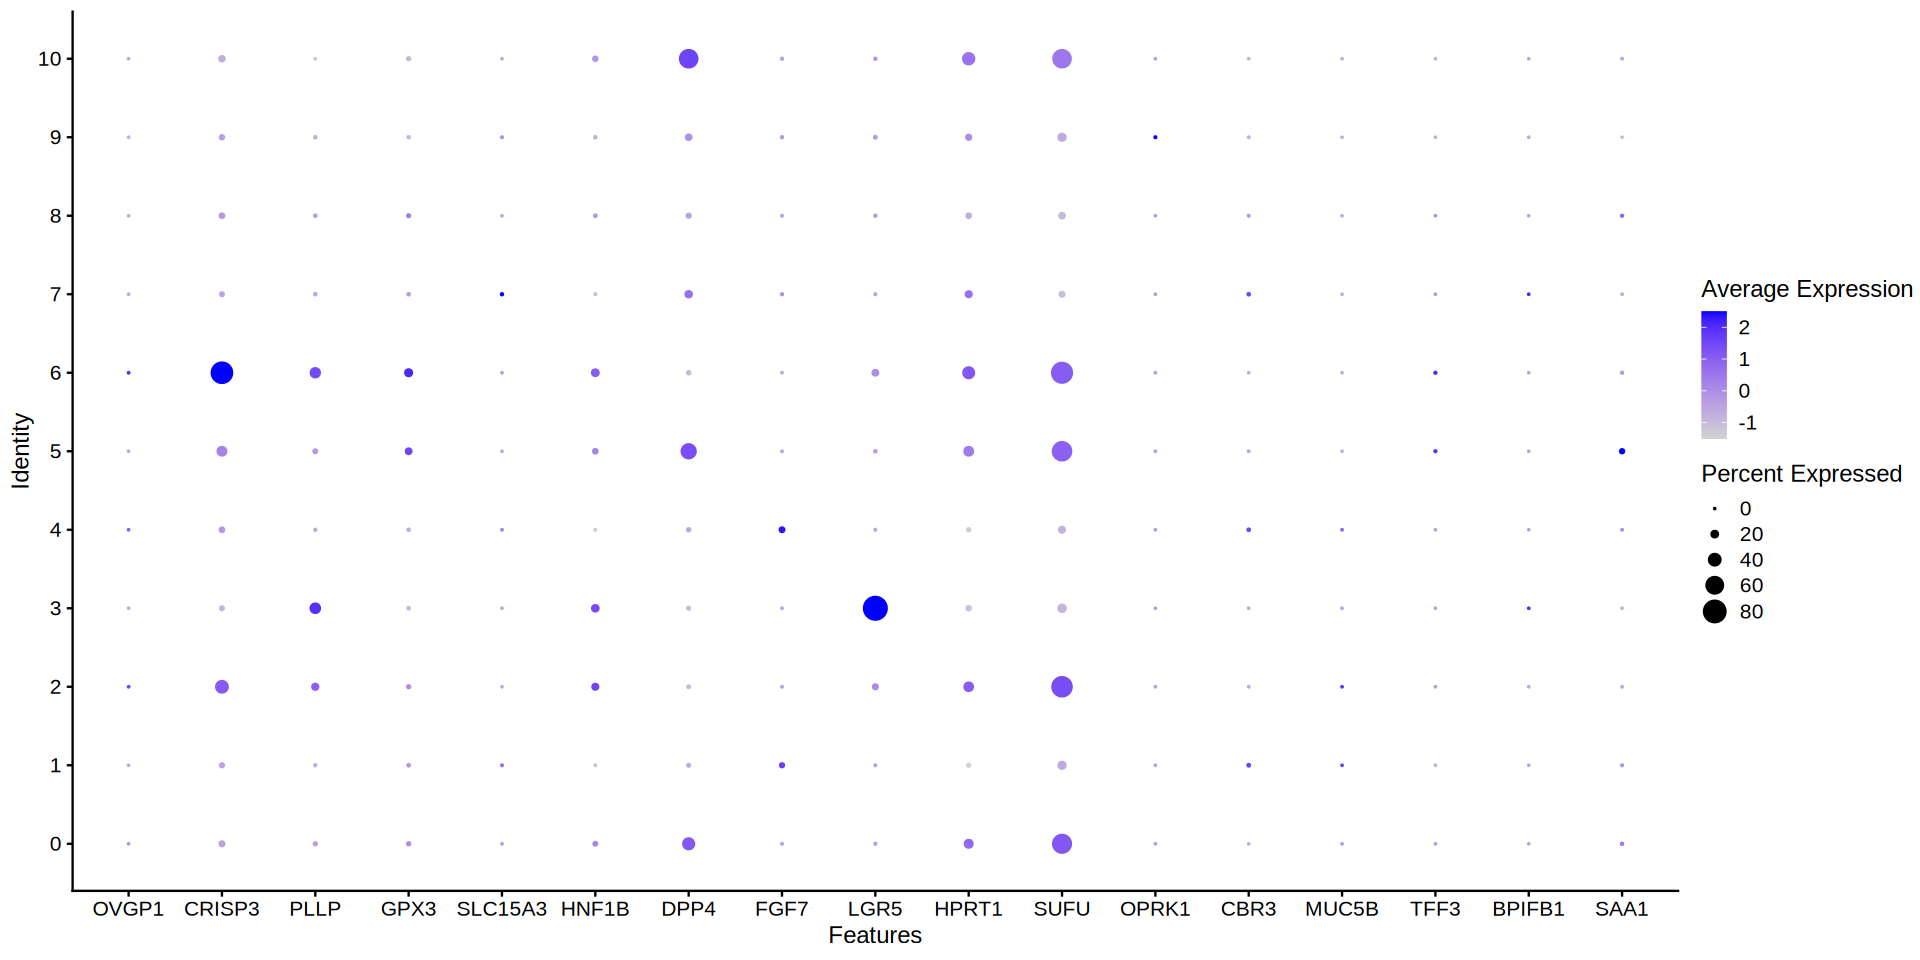

In [9]:
options(repr.plot.width=16, repr.plot.height=8)

# Markers of glandular / secretory cells 
DotPlot(postQC, features = c("OVGP1", "CRISP3", "PLLP", "GPX3", "SLC15A3", "HNF1B","DPP4", "PAEP",
                  "FGF7", 
                  "LGR5", 
                  "HPRT1", "SUFU", "OPRK1", "CBR3",  
                  "MUC5B", "TFF3", "BPIFB1", "SAA1"))

cluster 3 : very likely luminal as it expressed LGR5 

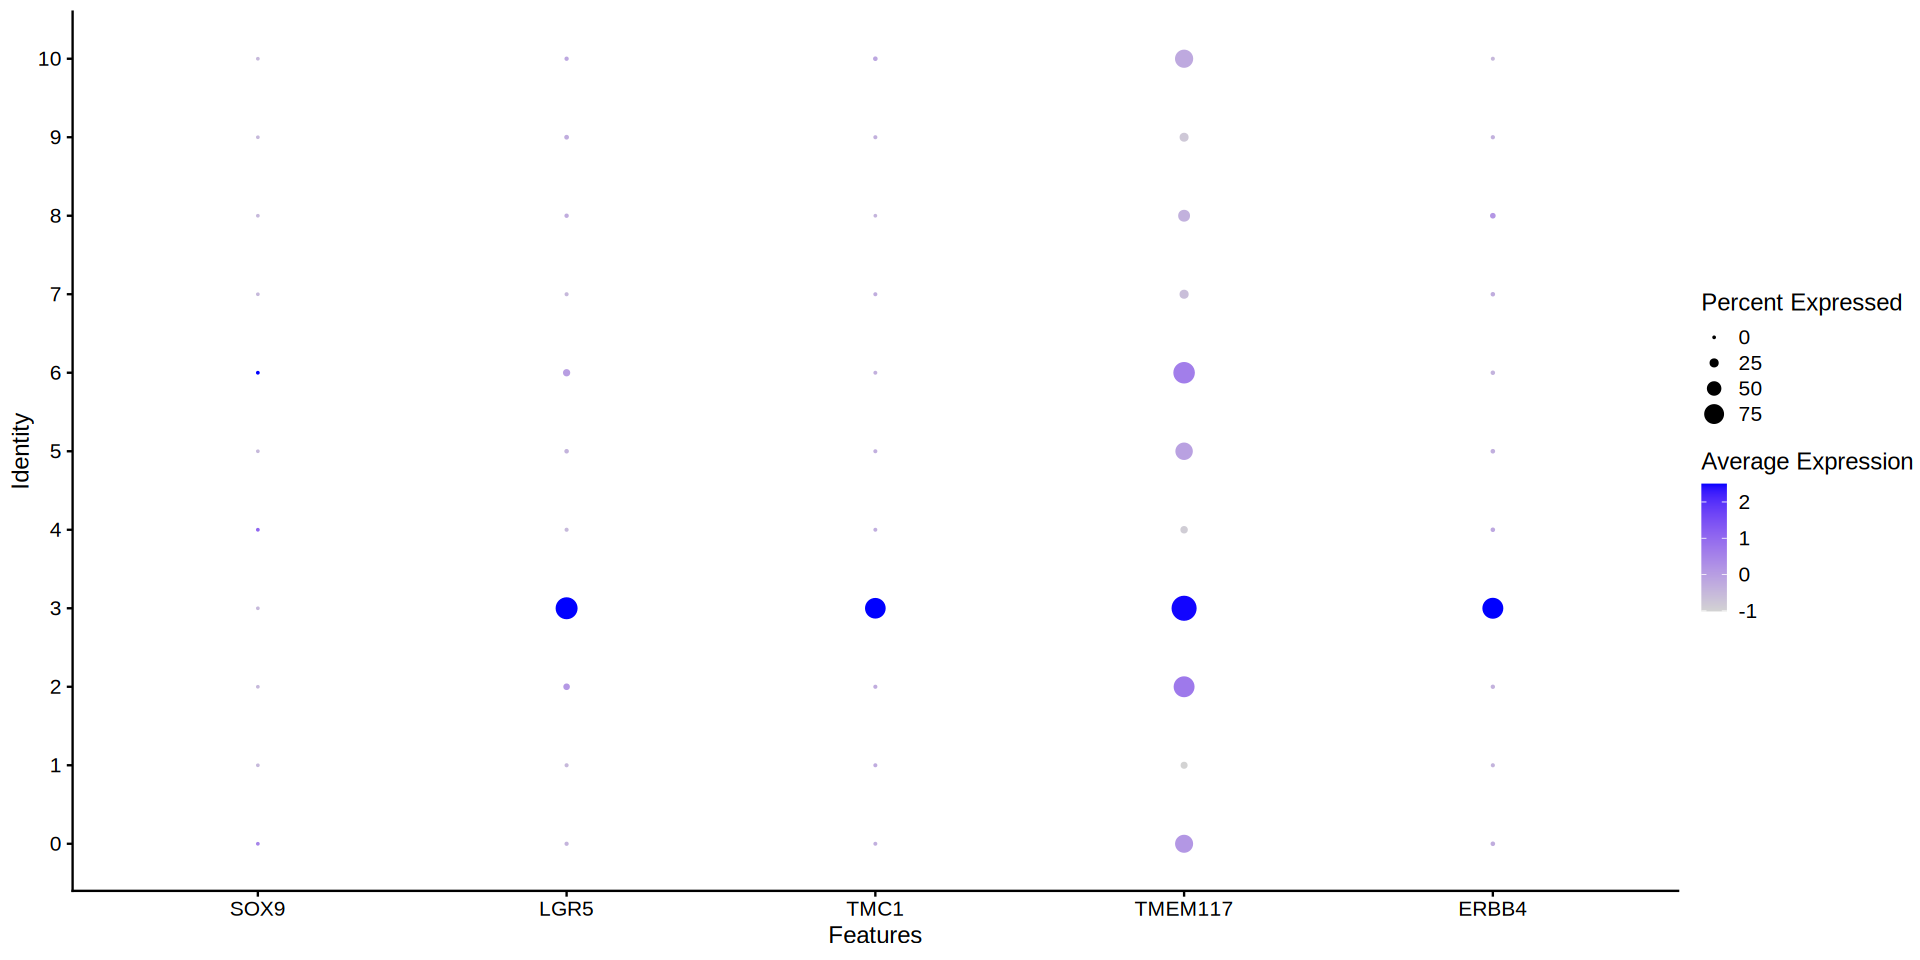

In [10]:
# Markers of epithelial luminal cells - here also determined base don FindMarkers function for the first line 
DotPlot(postQC, features = c("SOX9", "LGR5", "TMC1", "TMEM117", "ERBB4"))

CLuster 3 : luminal epithelial cells. As this cluster does not express the highest fraction of ERBB4 and also expresses the higher average expression of LGR5 althought the expression remains low.
We need to look at the specific markers genes in the species to decide.


## Markers for glandular secretory cells

- "Foxa2","Cxcl15","Sox9","Pcna" : mouse markers of endometrial glands during delveopment and uterine cell types specification. From  https://www.pnas.org/doi/epdf/10.1073/pnas.2316410120


-   GPX3, DPP4, PAEP : gene expression in 2023 VentoTormo paper 

-   FGF7 : marker of a specific glandular secretory cell in VentoTormo 2023 paper, but seems to be expressed in stromal cells in our case 


-   "HPRT1", "SUFU", "OPRK1", "CBR3" : markers of pre-glandular cells 


Warning message:
“The following requested variables were not found: CXCL15”


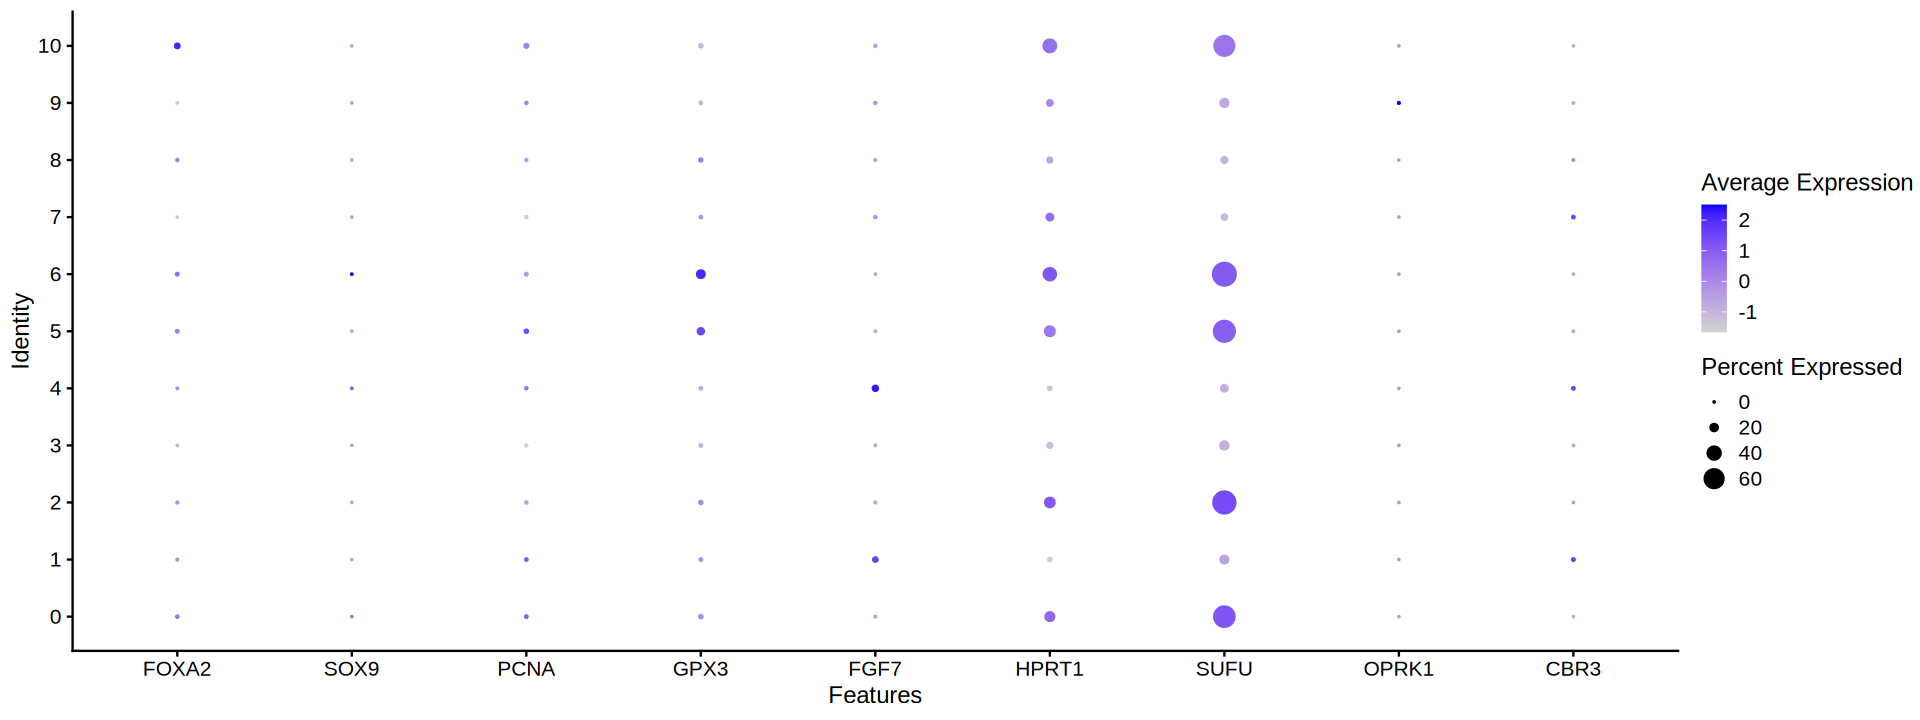

In [21]:
options(repr.plot.width=16, repr.plot.height=6)

DotPlot(postQC, features = c("FOXA2","CXCL15","SOX9", "PCNA","GPX3", "FGF7", "HPRT1", "SUFU", "OPRK1", "CBR3" ))


Clusters 0,2,5,6 : expressed SUFU and HPRT1, markers of pre-glandular secretory cells in humans

## Markers of cilliated cells

From Human Protein Atlas
From bibliography : WDR49, DNAH7, DNAH5 : TF for ciliated cells in human
Ciliated cells TF : RFX RFX2 RFX 3
Gene for the assembly of cilium : LDLRAD1 AK8 SOACA9
Markers of ciliated cells in VentoTormo 2023 : FOXJ1 PIFO
Markers of ciliated cells for lungs : FOXJ1, TUBB4B, CCDC17, “STK11”, “RSPH9”, “CCDC40”, SEC14L3

Warning message:
“The following requested variables were not found: DNAFF3”


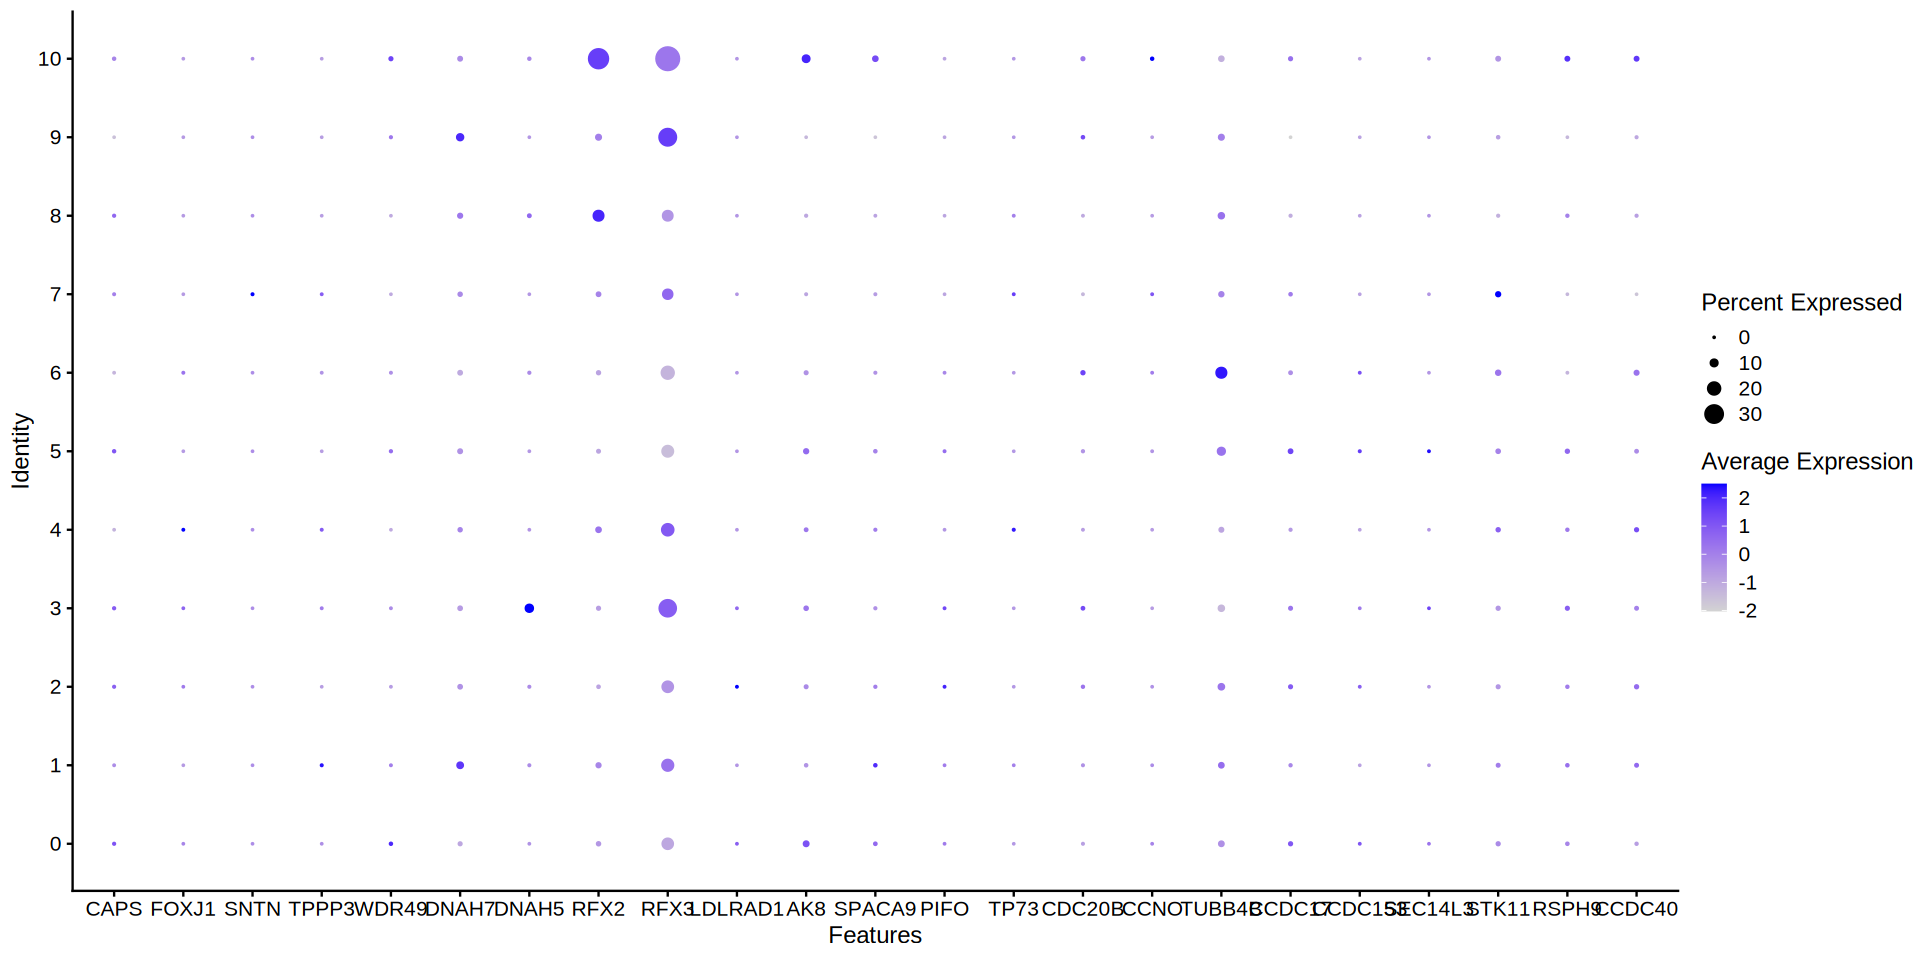

In [12]:
DotPlot(postQC, features = c("CAPS", "FOXJ1", "SNTN", "TPPP3", 
                  "WDR49", "DNAH7", "DNAH5", 
                  "RFX2", "RFX3", 
                  "LDLRAD1", "AK8", "SPACA9", 
                  "PIFO", "DNAFF3",
                  "TP73", "CDC20B", "CCNO", 
                  "TUBB4B", "CCDC17", "CCDC153", "SEC14L3", "STK11", "RSPH9", "CCDC40" ))

RFX2 and RFX3 are known to be expressed in ciliated epithelial cells but this is not specific. 

In [6]:
# Find all markers

# find markers for every cluster compared to all remaining cells, report only genes with positive DE
Idents(postQC) = postQC$soupx_snn_res.0.3
all_markers = FindAllMarkers(object = postQC,
                          only.pos = TRUE, # genes more expressed in the cluster compared
                          min.pct = 0.25, # % of cell expressing the marker
                          logfc.threshold = 0.1)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10



In [9]:
# Save the list of markers
write.table(all_markers, file = paste0(outdir, species,"_markers.tab"), sep = "\t", quote = FALSE, row.names = FALSE )
# Read saved table
all_markers = read.table(paste0(outdir, species,"_markers.tab"), sep = "\t")

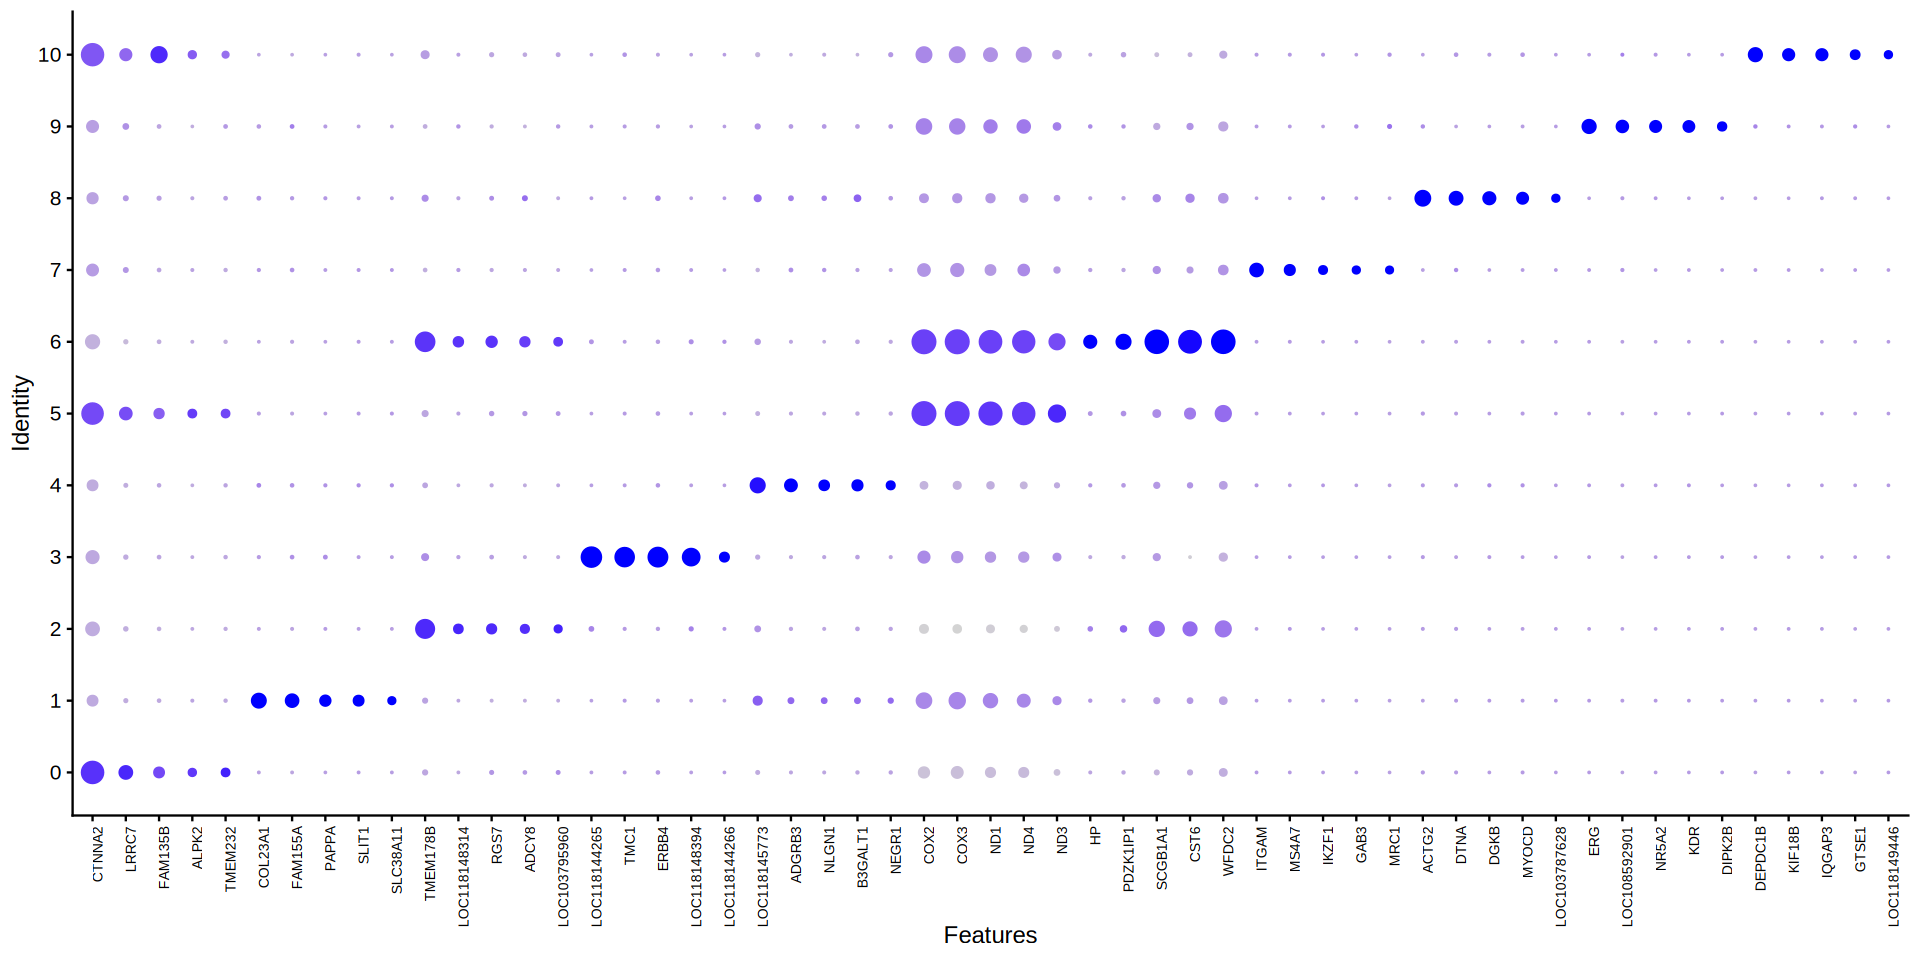

In [14]:
# Save in a table 3 genes the most differentially expressed in one cluster VS all the other clusters
top5_markers = as.data.frame(all_markers %>% 
                               group_by(cluster) %>% 
                               top_n(n = 5, wt = avg_log2FC))
# Create a dotplot the vidualise the expression of genes by cluster
options(repr.plot.width=16, repr.plot.height=8)

Seurat::DotPlot(postQC, features = unique(top5_markers$gene)) +
  # this second part of the code is just for esthetics :
  ggplot2::theme(axis.text.x = ggplot2::element_text(angle = 90, 
                                                     vjust = 1,
                                                     size = 8, 
                                                     hjust = 1)) +
  Seurat::NoLegend()

In [15]:
top15_markers = as.data.frame(all_markers %>% 
                               group_by(cluster) %>% 
                               top_n(n = 15, wt = avg_log2FC))
top15_markers %>% filter(cluster ==4)


p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster gene        
1   0.000000e+00 3.392095   0.658 0.114  0.000000e+00 4       FBXL7       
2   0.000000e+00 3.213865   0.755 0.215  0.000000e+00 4       COL4A5      
3   0.000000e+00 3.262200   0.601 0.111  0.000000e+00 4       MATN2       
4   0.000000e+00 3.756673   0.577 0.119  0.000000e+00 4       LOC118145773
5   0.000000e+00 4.265740   0.471 0.044  0.000000e+00 4       ADGRB3      
6  7.050980e-303 4.288238   0.369 0.039 2.518892e-298 4       NLGN1       
7  4.016779e-297 3.549562   0.509 0.091 1.434954e-292 4       ABCA8       
8  2.083421e-279 3.327534   0.636 0.176 7.442815e-275 4       PTCH1       
9  2.746831e-249 3.831064   0.392 0.060 9.812780e-245 4       B3GALT1     
10 1.147469e-228 3.309875   0.412 0.071 4.099218e-224 4       FAT4        
11 6.459148e-191 4.025648   0.297 0.042 2.307466e-186 4       NEGR1       
12 3.454254e-181 3.700812   0.257 0.032 1.233998e-176 4       THSD7B      
13 1.919252e-175 3.441793   0.273 0.038 6.856336e-171 4       ANK2        
14 1.680394e-172 3.363375   0.260 0.035 6.003040e-168 4       SLIT3       
15 1.028788e-170 3.554373   0.257 0.034 3.675243e-166 4       PID1

## Markers for stromal cells 

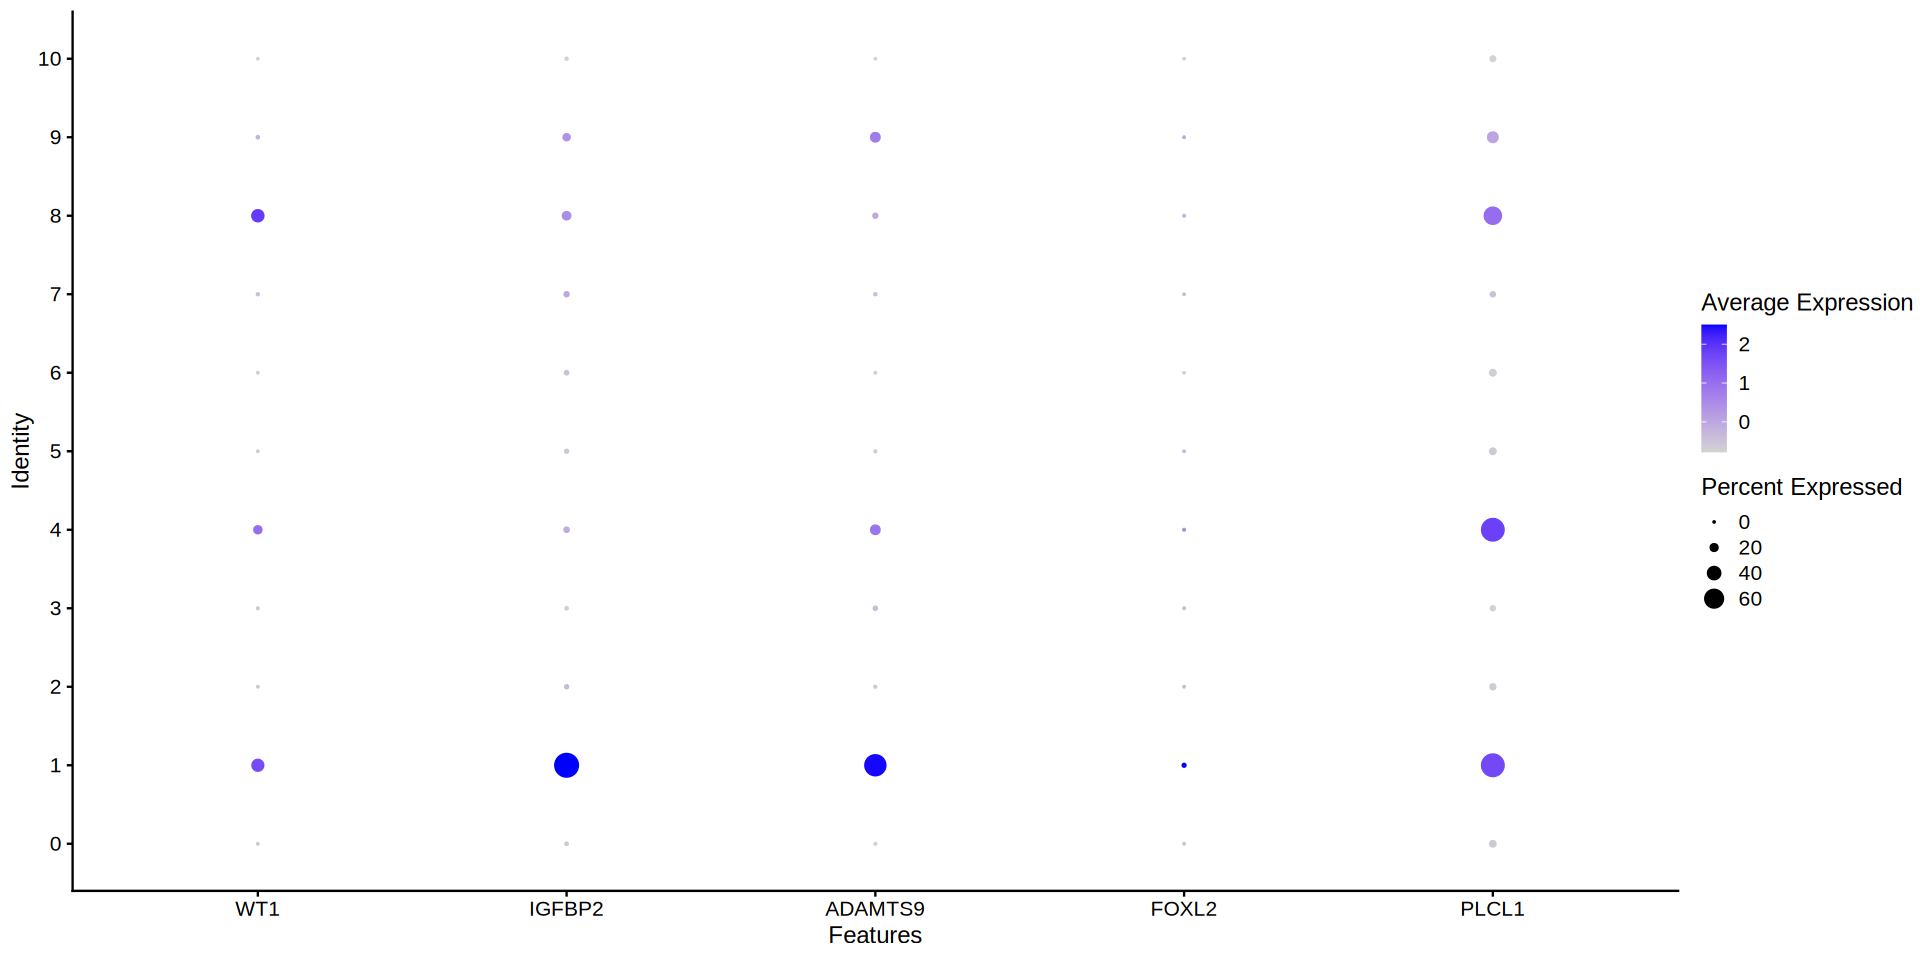

In [16]:
# Expression of markers of stromal cells
stromal_endometrial = c("WT1", "IGFBP2", "ADAMTS9", "FOXL2","PLCL1" )# Proliferative endometrial stromal cells Human (VT2023)
DotPlot(postQC, features = stromal_endometrial)

Stromal cells is the cluster 1 and cluster8?

## Markers for endothelial cells 

Warning message:
“The following requested variables were not found: ACE”


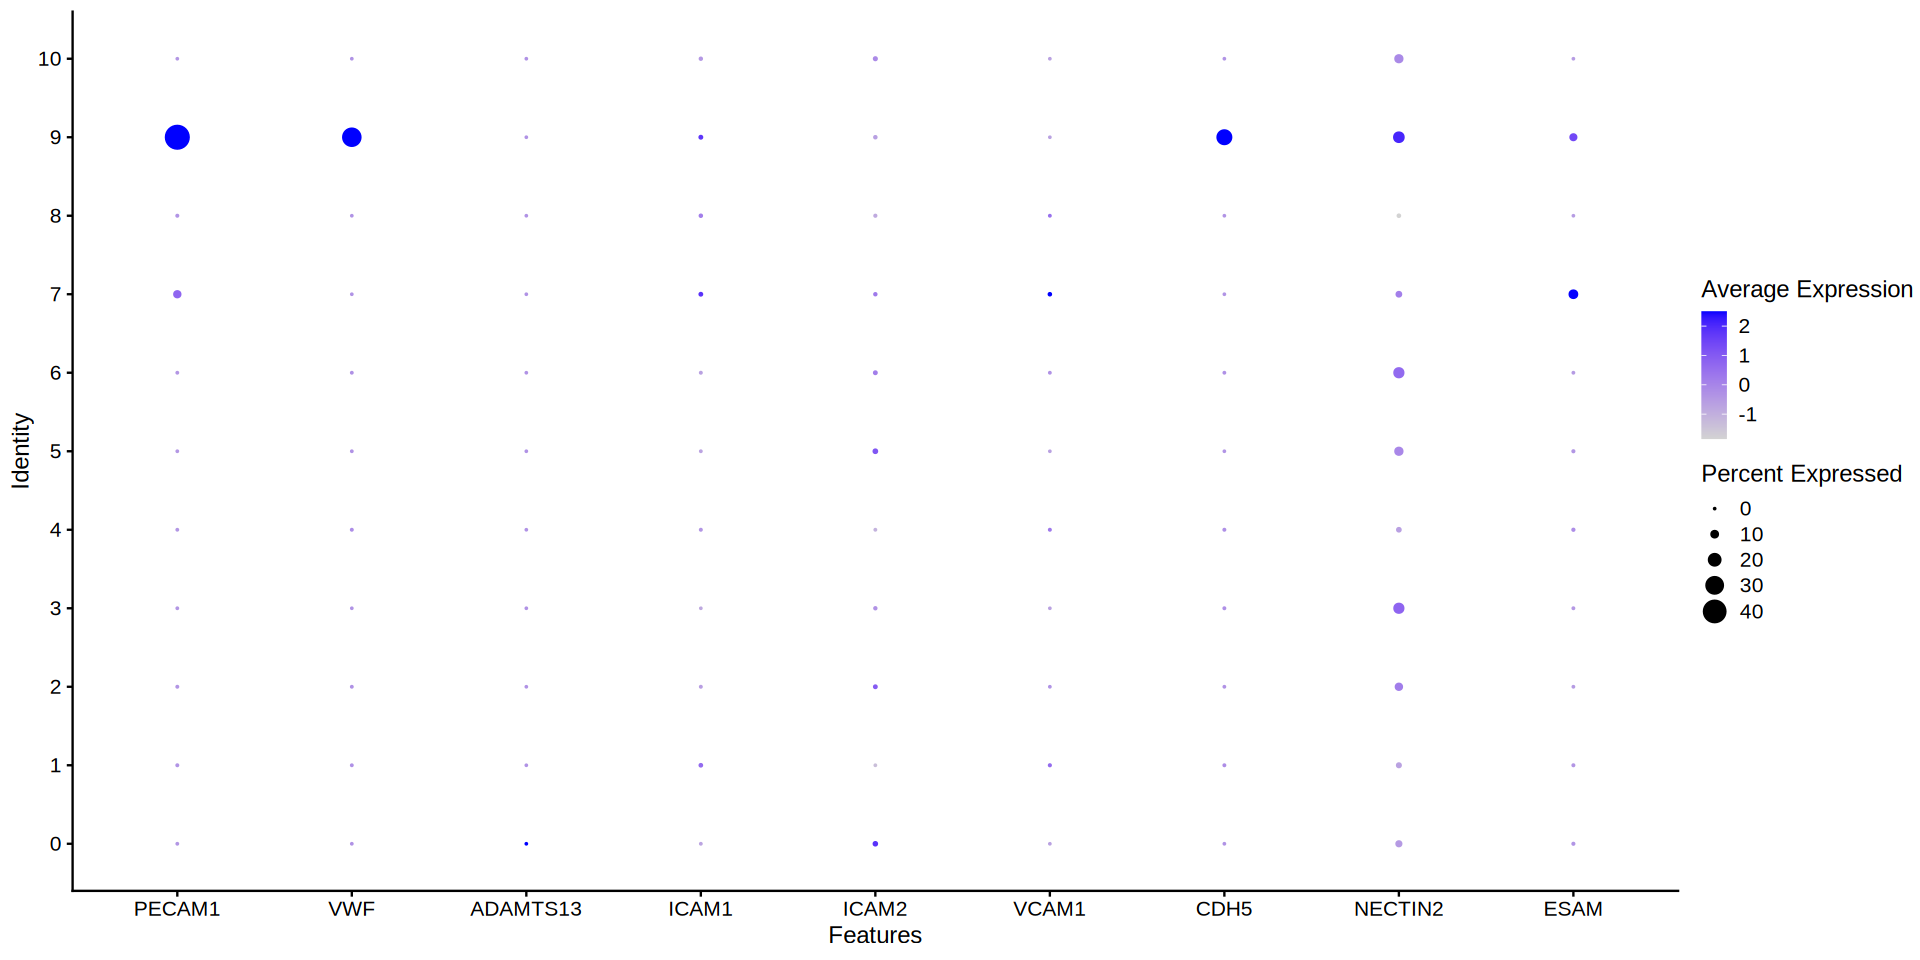

In [17]:
# Expression of endothelial markers 
endothelial = c("PECAM1", "ACE", "VWF", "ADAMTS13", "ICAM1", "ICAM2", "VCAM1", "CDH5", "NECTIN2", "ESAM")
DotPlot(postQC, features = endothelial)

Cluster 9 is endothelial cells 

## Markers for immune cells 

Warning message:
“The following requested variables were not found: CD11B”


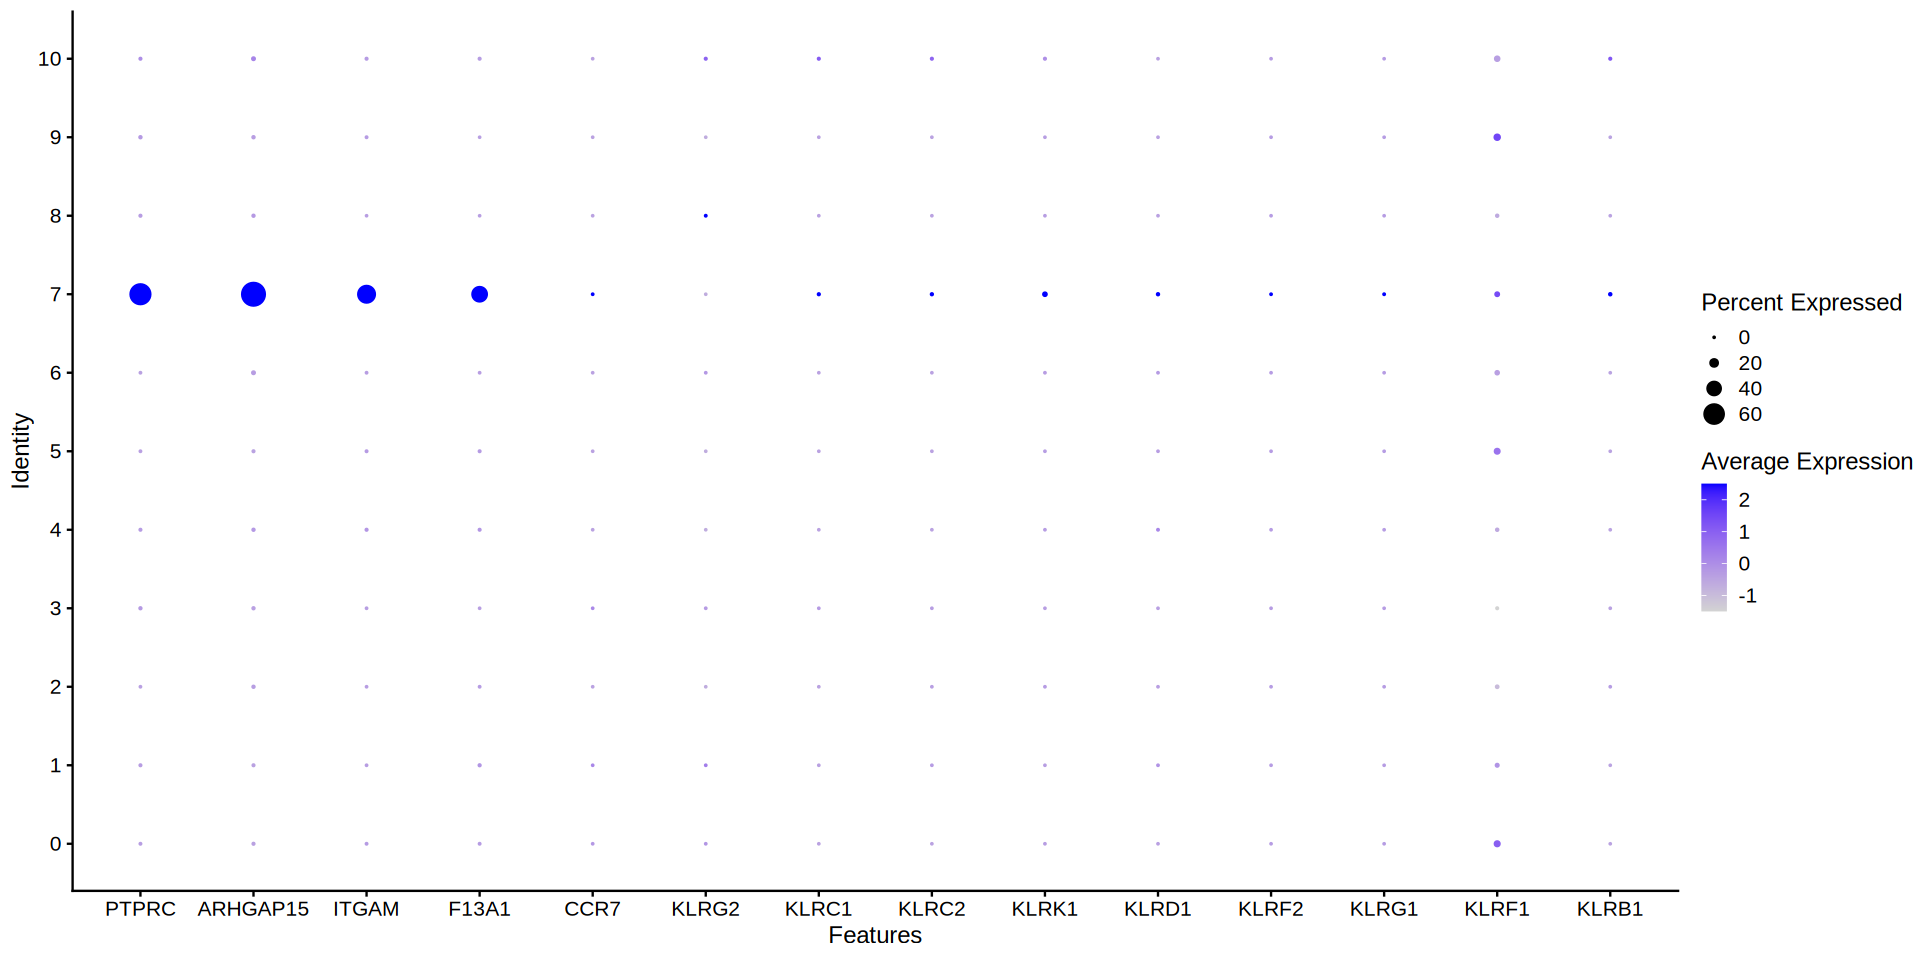

In [18]:
# Expression of lymphoid markers 
klr = grep("^KLR", rownames(postQC), value = TRUE)

immune = c("PTPRC", "ARHGAP15", "ITGAM", "F13A1", "CCR7","CD11B", klr)
DotPlot(postQC, features = immune)

Cluster 7 is immune cells 

## Resume of all markers used to identify cells 

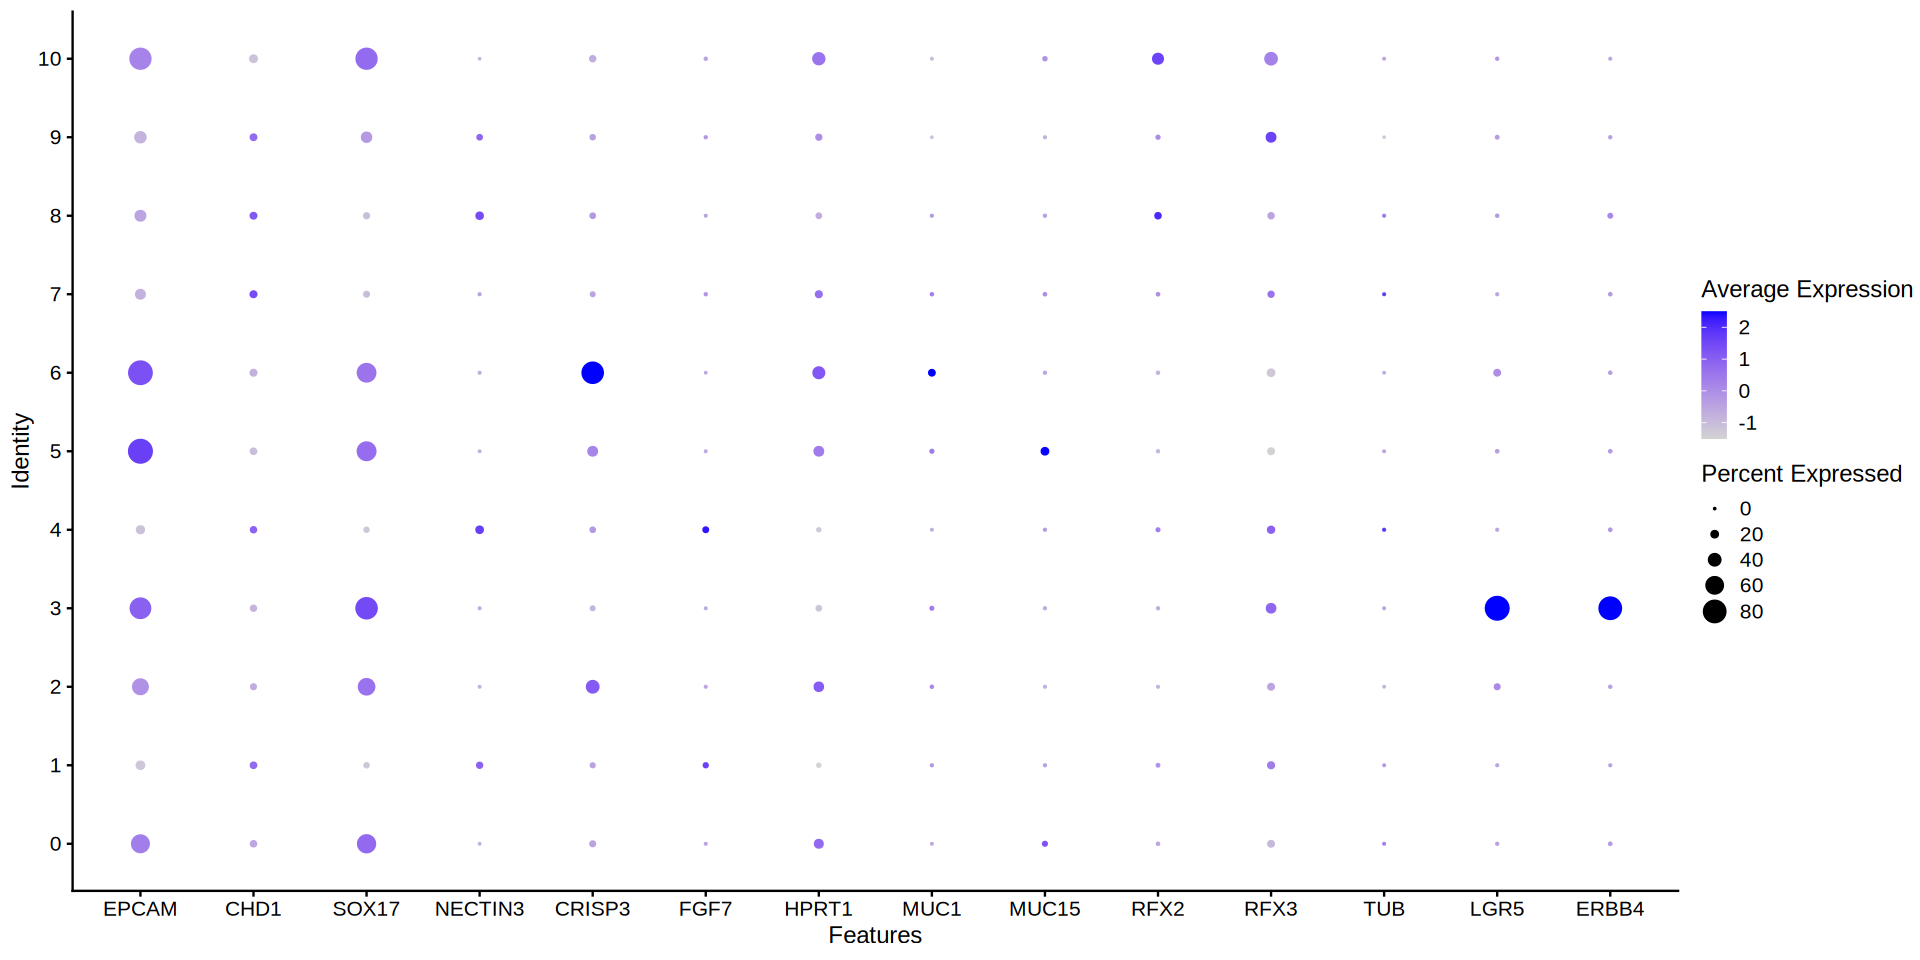

In [19]:
epithelial_markers = c("EPCAM", "CHD1", "SOX17", "NECTIN3", # global epithelial markers
                       "CRISP3", "FGF7", "HPRT1", "MUC1", "MUC15", # markers of glandular - secretory epithelial cells
                       "RFX2", "RFX3", "TUB", #markers of ciliated cells 
                       "LGR5", "ERBB4") # markers of luminal epithelial cells in the marmoset
DotPlot(postQC, features = epithelial_markers)

## Automatic annotation using Mareckova dataset 

In [22]:
#------------------------------------------------------------------------
# INPUT DATASET

# Create SingleCellExperiment object for my dataset to annotate
# Using the LogNormalised counts from the merge object 
sce = as.SingleCellExperiment(postQC, assay = "soupx", layer = "counts")
sce


#------------------------------------------------------------------------
# AUTOMATIC ANNOTATION

### GARCIA ALONSO DATASET AS A REFERENCE

#### BY CELL

# Load the reference packages from Garcia Allonso paper (single cell)
# garcia_alonso_2021 = readRDS(file = "/pasteur/zeus/projets/p01/Cofugeno/euliorzo/evomens/ressources/ventotormo/230526-garcia-alonso-endometrium-single-cell-experiment.RDS")

# removing unlabelled libraries
# garcia_alonso_2021 = garcia_alonso_2021[,!is.na(garcia_alonso_2021$Cell.type)]

# Load the reference atlas from Mareckova et al 2024 (single cell, healthy, no hormonal treatments)
mareckova_2024 = readRDS(file = "/pasteur/zeus/projets/p01/Cofugeno/euliorzo/evomens/ressources/ventotormo/Mareckova2023_human_healthy_notreatment.rds")
mareckova_2024 = mareckova_2024[,!is.na(mareckova_2024$celltype)]

## Create a single cell experiment object 
sceR = as.SingleCellExperiment(mareckova_2024, assay = "RNA", layer = "counts")
sceR

# RUN SINGLE R
# Time : ~2h

Pred_CellType_Mareckova = SingleR(test=sce,
                                     ref=sceR,
                                     labels=sceR$celltype,
                                     de.method="wilcox",
                                     assay.type.test = "logcounts",
                                  #   assay.type.ref = "logcounts",
                                     BPPARAM = BiocParallel::SerialParam())
table(Pred_CellType_Mareckova$labels)

# Add predicted labels to Seurat object
postQC$Pred_CellType_Mareckova = Pred_CellType_Mareckova$labels

Warning message:
“The following arguments are not used: layer”


class: SingleCellExperiment 
dim: 35724 9297 
metadata(0):
assays(2): counts logcounts
rownames(35724): LOC118152083 LOC100387375 ... unassigned-gene-23
  unassigned-gene-24
rowData names(0):
colnames(9297): AAACCCAAGCCTCATA-1 AAACCCAAGGCCATAG-1 ...
  TTTGTTGGTGCTTATG-1 TTTGTTGTCTCGTGGG-1
colData names(19): orig.ident nCount_soupx ... Manual_annotation ident
reducedDimNames(6): PCA_DOUBLET UMAP_DOUBLET ... PCA UMAP
mainExpName: soupx
altExpNames(0):

Warning message:
“The following arguments are not used: layer”


class: SingleCellExperiment 
dim: 33578 38190 
metadata(0):
assays(2): counts logcounts
rownames(33578): A1BG A1BG-AS1 ... ZYX ZZEF1
rowData names(0):
colnames(38190): UA_Endo11282193_GGAAGTGTCTTCTGTA
  UA_Endo12061704_TCTACCGGTCCAATCA ... UA_Endo11460961_ATAGGCTTCCGGTAAT
  UA_Endo11460961_AAAGTCCAGTTGGCGA
colData names(30): n_genes sample ... label_long ident
reducedDimNames(2): SCVI UMAP
mainExpName: RNA
altExpNames(0):


            Arterial             Ciliated              Cycling 
                  30                    2                  464 
      dStromal_early        dStromal_late         dStromal_mid 
                 897                  395                  952 
           eHormones               ePV_1a               ePV_1b 
                  76                   68                    8 
               ePV_2             eStromal     eStromal_cycling 
                  60                  155                    5 
       eStromal_MMPs            Glandular  Glandular_secretory 
                   3                    2                  212 
              HOXA13      Immune_Lymphoid       Immune_Myeloid 
                  88                   61                  273 
             Luminal            Lymphatic                MUC5B 
                 220                   18                  193 
        preGlandular           preLuminal         SOX9_basalis 
                3599                  6

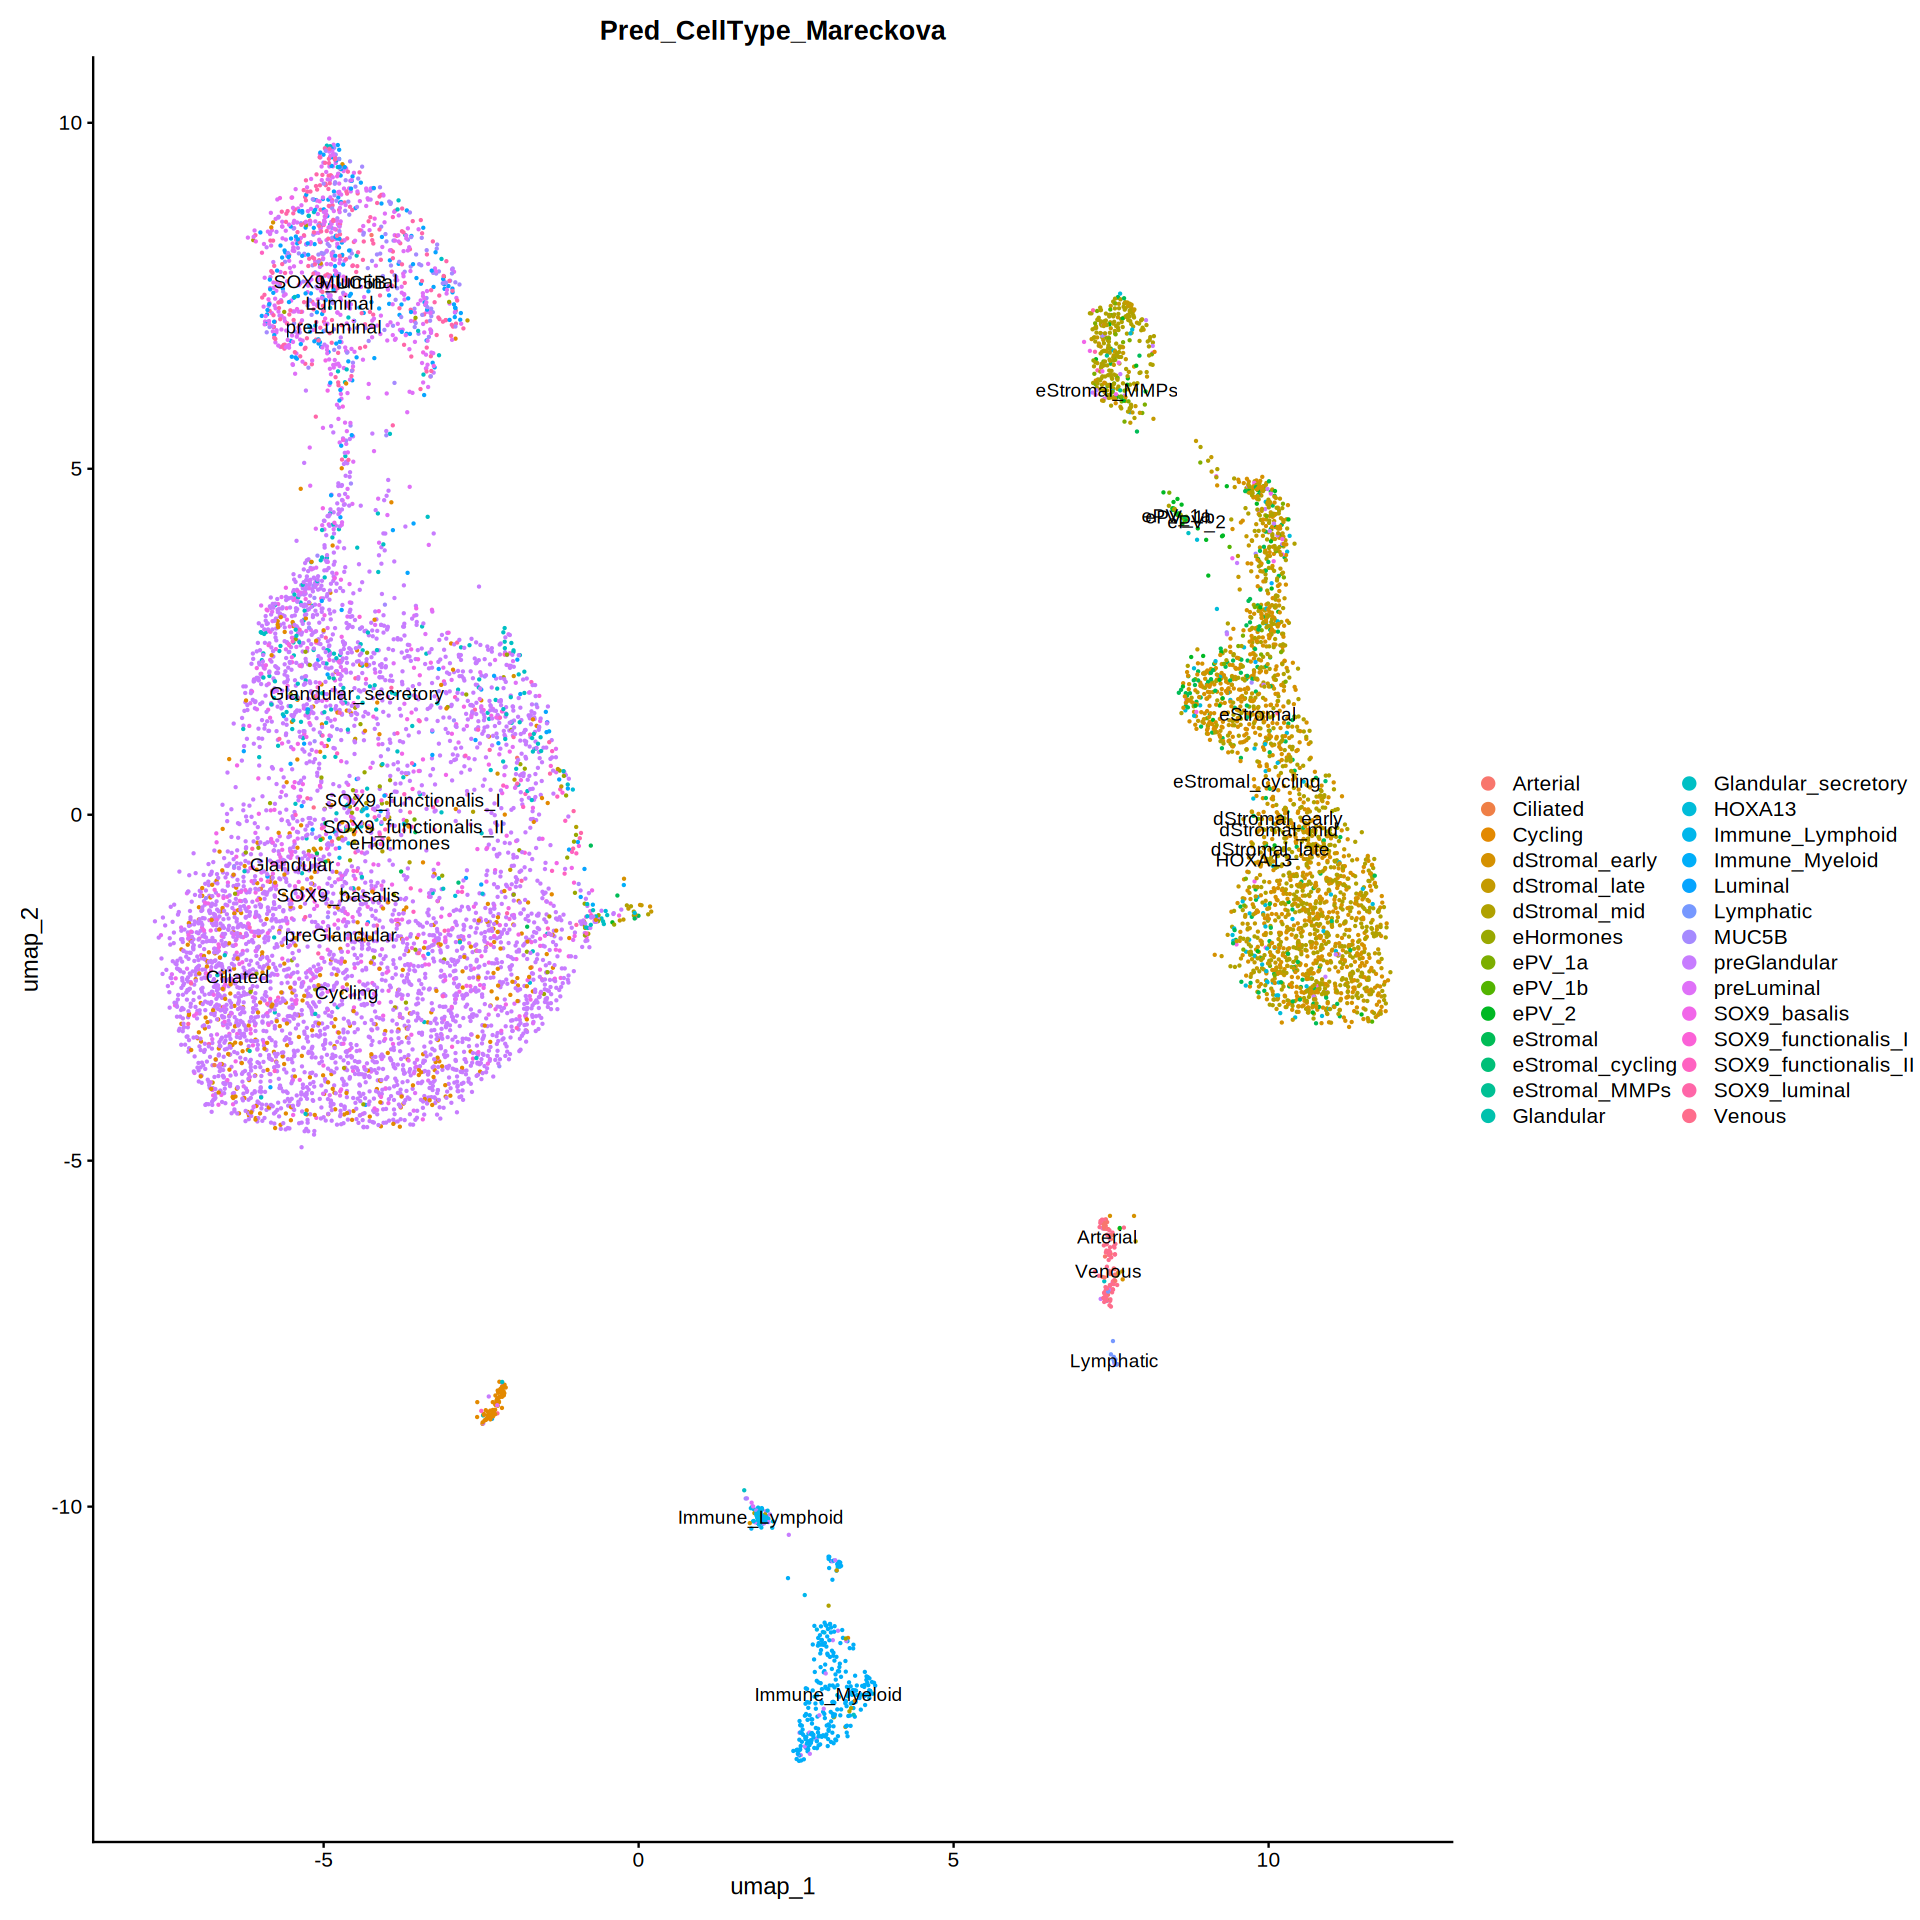

In [24]:
options(repr.plot.width=16, repr.plot.height=16)

DimPlot(postQC, reduction = "umap", 
        group.by = c("Pred_CellType_Mareckova"), 
        label = TRUE) 

## Manual annotation 

In [4]:
## Give Manual annotation to Seurat Clusters 
manual_annot = c("Epithelial_Glandular_Secretory", "Stromal","Epithelial_Glandular_Secretory", "Epithelial_Luminal", "Epithelial_Glandular_Secretory", "Stromal", "Immune", "Myometrium", "Endothelial", "Epithelial_Cycling")
# Set the levels to Manual Annotation 
Idents(postQC) = postQC$soupx_snn_res.0.2
postQC$Manual_annotation = postQC$soupx_snn_res.0.2
names(manual_annot) <- levels(postQC)
# Change Ident to the manual annotation 
postQC = RenameIdents(postQC, manual_annot)
# Replace labels for the column Manual Annotation
postQC$Manual_annotation = Idents(postQC)

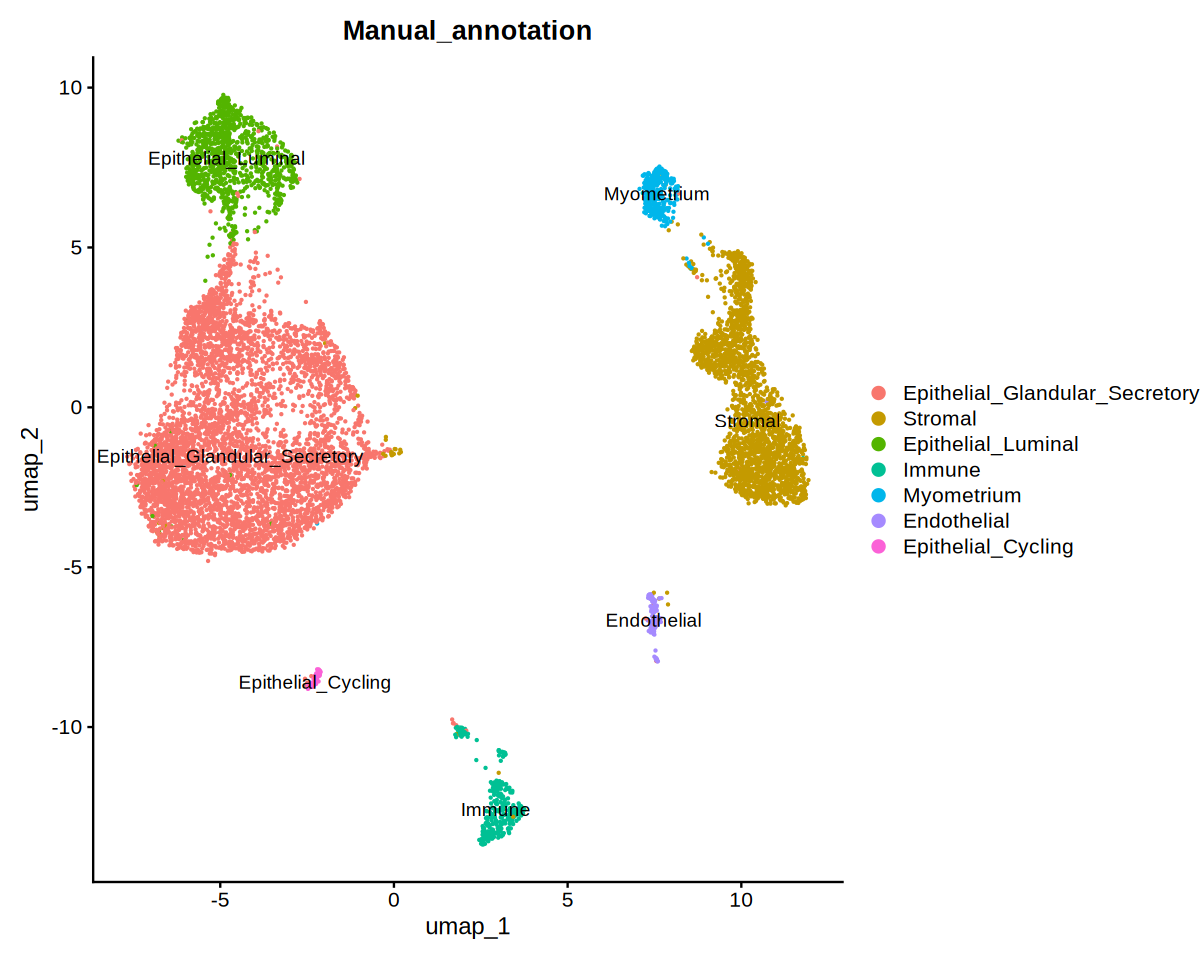

In [5]:
options(repr.plot.width=10, repr.plot.height=8)

DimPlot(postQC, reduction = "umap", 
        group.by = c("Manual_annotation"), 
        label = TRUE) 

In [7]:
#------------------------------------------
### OUTPUT 

# Saving RDS object post QC 
saveRDS(postQC, file = paste0(outdir,"seuratobject/", species,"_processed.rds"))


## Markers genes after cell type annotation 

In [5]:
## Save markers by cell population after annotation 
# Merge the object if not done previously 

# find markers for every cluster compared to all remaining cells, report only genes with positive DE 
Idents(postQC) = postQC$Manual_annotation
all_markers = FindAllMarkers(object = postQC, 
                          only.pos = TRUE, # genes more expressed in the cluster compared
                          min.pct = 0.25, # % of cell expressing the marker
                          logfc.threshold = 0.1) 

Calculating cluster Epithelial_Glandular_Secretory

Calculating cluster Stromal

Calculating cluster Epithelial_Luminal

Calculating cluster Immune

Calculating cluster Myometrium

Calculating cluster Endothelial

Calculating cluster Epithelial_Cycling



In [11]:
# Save in a table 3 genes the most differentially expressed in one cluster VS all the other clusters
write.table(x =all_markers, file = paste0("../../../results/snRNA-seq/", species, "_markers_cell_clusters.tab"), sep="\t", quote = F, row.names = F)
top5_markers = as.data.frame(all_markers %>% 
                               group_by(cluster) %>% 
                               top_n(n = 5, wt = avg_log2FC))
top10_markers = as.data.frame(all_markers %>% 
                               group_by(cluster) %>% 
                               top_n(n = 10, wt = avg_log2FC))

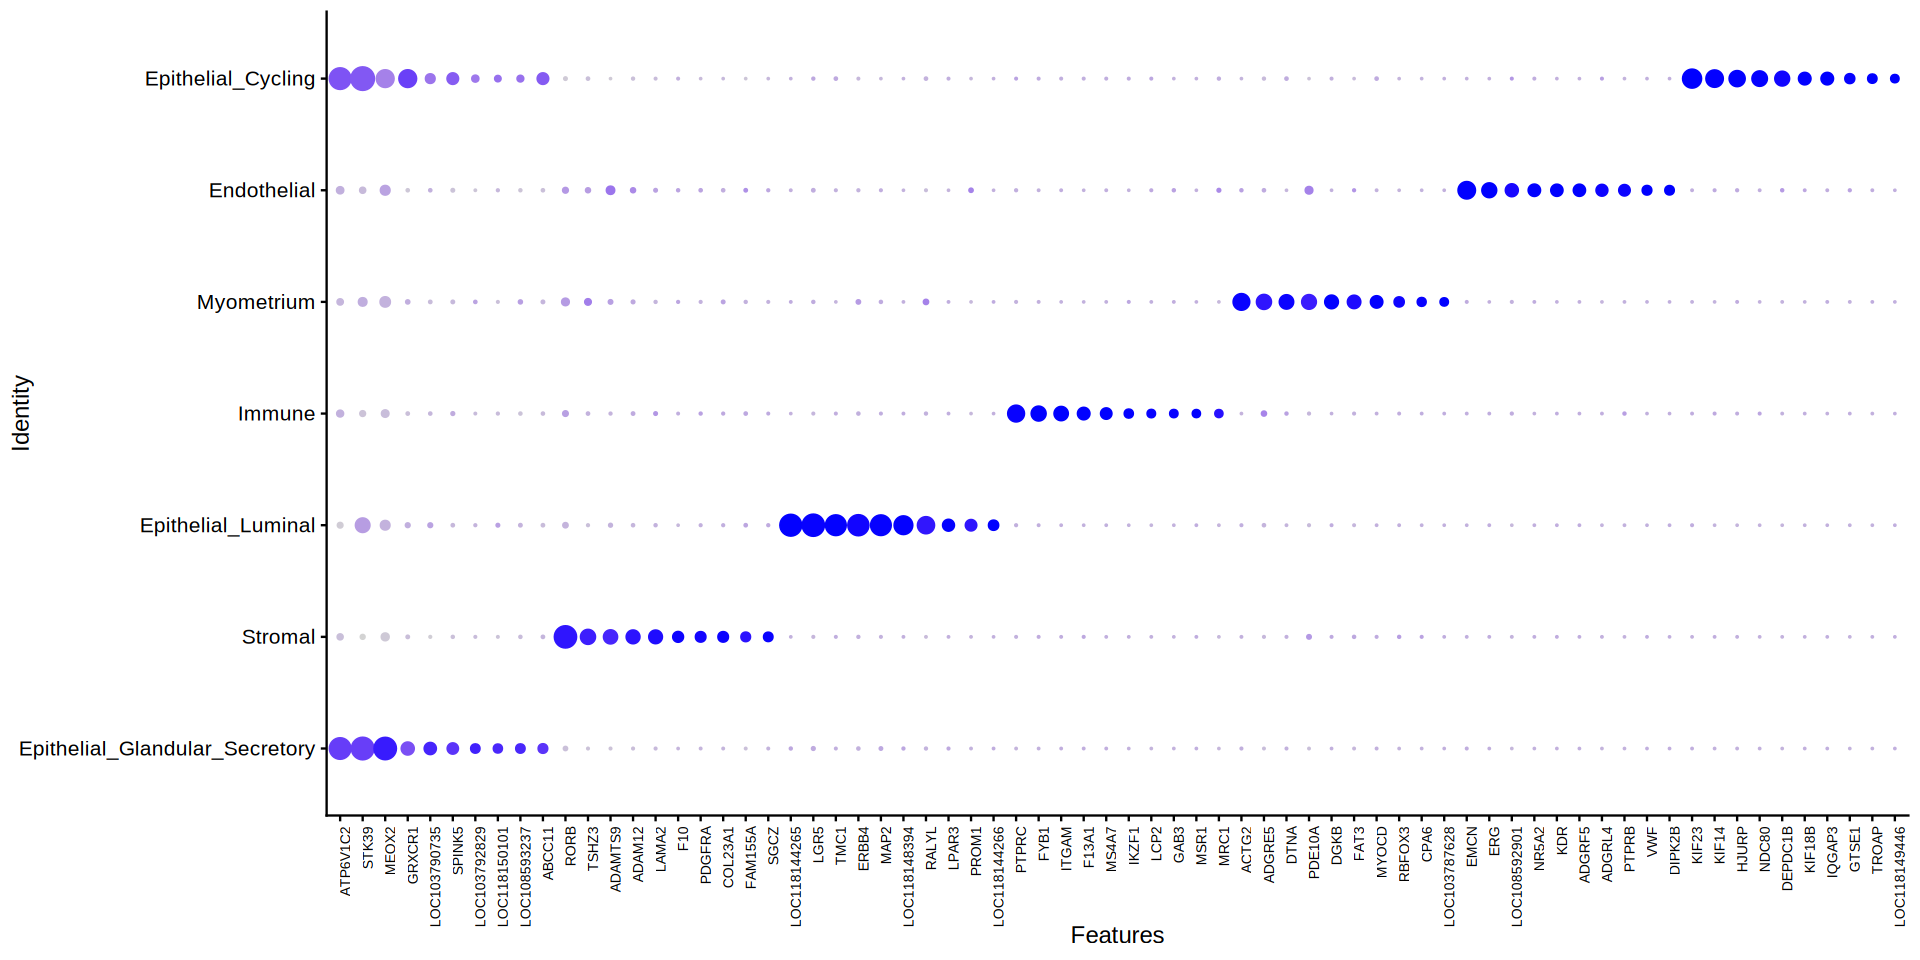

In [8]:
# Create a dotplot the vidualise the expression of genes by cluster
options(repr.plot.width=16, repr.plot.height=8)

Seurat::DotPlot(postQC, features = unique(top10_markers$gene)) +
  # this second part of the code is just for esthetics :
  ggplot2::theme(axis.text.x = ggplot2::element_text(angle = 90, 
                                                     vjust = 1,
                                                     size = 8, 
                                                     hjust = 1)) +  Seurat::NoLegend()